

#  Real estate - PGP


* A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
* The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
* A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
* The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.

Tableau Dashboard:

https://public.tableau.com/app/profile/ming.lee6423/viz/CapstoneRealEstateAnalysis/Dashboard1?publish=yes

In [1]:
import math
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

### Data Import and Preparation:

1. Import data.
2. Figure out the primary key and look for the requirement of indexing.


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

The primary key needs to have a unique identifier for each row in our data frame

Duplicates were found after comparing the number of unique values with the number of counts within the UID column

All duplicate rows were dropped

UID is set as a unique index

In [3]:
print('Train: The number of unique values {} vs the number of all values {}'.format(df_train[['UID']].nunique()[0],df_train[['UID']].count()[0]))
print('Test: The number of unique values {} vs the number of all values {}'.format(df_test[['UID']].nunique()[0],df_test[['UID']].count()[0]))

Train: The number of unique values 27161 vs the number of all values 27321
Test: The number of unique values 11677 vs the number of all values 11709


In [4]:
# drop duplicate rows
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)
print('Check if duplicates are removed in Train and Test:')
print(df_train['UID'].nunique() == df_train['UID'].count())
print(df_test['UID'].nunique() == df_test['UID'].count())

Check if duplicates are removed in Train and Test:
True
True


In [5]:
df_train = df_train.set_index('UID')
df_train.head()

BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
UID                                                                  
267822      NaN       140        53       36     New York       NY   
246444      NaN       140       141       18      Indiana       IN   
245683      NaN       140        63       18      Indiana       IN   
279653      NaN       140       127       72  Puerto Rico       PR   
247218      NaN       140       161       20       Kansas       KS   

              city           place   type primary  ...  female_age_mean  \
UID                                                ...                    
267822    Hamilton        Hamilton   City   tract  ...         44.48629   
246444  South Bend        Roseland   City   tract  ...         36.48391   
245683    Danville        Danville   City   tract  ...         42.15810   
279653    San Juan        Guaynabo  Urban   tract  ...         47.77526   
247218   Manhattan  Manhattan City   City   tract  ...         24.17693   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
267822              2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
246444              1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
245683              3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
279653              1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
247218              3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  

[5 rows x 79 columns]

In [6]:
df_test = df_test.set_index('UID')
df_test.head()

BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
255504      NaN       140       163       26      Michigan       MI   
252676      NaN       140         1       23         Maine       ME   
276314      NaN       140        15       42  Pennsylvania       PA   
248614      NaN       140       231       21      Kentucky       KY   
286865      NaN       140       355       48         Texas       TX   

                  city                  place     type primary  ...  \
UID                                                             ...   
255504         Detroit  Dearborn Heights City      CDP   tract  ...   
252676          Auburn            Auburn City     City   tract  ...   
276314       Pine City              Millerton  Borough   tract  ...   
248614      Monticello        Monticello City     City   tract  ...   
286865  Corpus Christi                  Edroy     Town   tract  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
255504         34.78682           33.75000          21.58531   
252676         44.23451           46.66667          22.37036   
276314         41.62426           44.50000          22.86213   
248614         44.81200           48.00000          21.03155   
286865         40.66618           42.66667          21.30900   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
255504                 416.48097              1938.0  0.70252  0.28217   
252676                 532.03505              1950.0  0.85128  0.64221   
276314                 453.11959              1879.0  0.81897  0.59961   
248614                 263.94320              1081.0  0.84609  0.56953   
286865                 709.90829              2956.0  0.79077  0.57620   

        married_snp  separated  divorced  
UID                                       
255504      0.05910    0.03813   0.14299  
252676      0.02338    0.00000   0.13377  
276314      0.01746    0.01358   0.10026  
248614      0.05492    0.04694   0.12489  
286865      0.01726    0.00588   0.16379  

[5 rows x 79 columns]


3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.


In [7]:
nulls_in_train = df_train.isnull().sum()[df_train.isnull().sum() > 0]

In [8]:
nulls_in_Test = df_test.isnull().sum()[df_test.isnull().sum() > 0]

In [9]:
n1 = df_train.shape[0]
n2 = df_test.shape[0]
p1 = round((nulls_in_train/n1) * 100, 2)
p2 = round((nulls_in_Test/n2) * 100, 2)

In [10]:
pd.DataFrame(list(zip(nulls_in_train, nulls_in_Test, p1, p2)), columns=['train NaN','test NaN','train %','test %'],index=nulls_in_train.index)

train NaN  test NaN  train %  test %
BLOCKID                          27161     11677   100.00  100.00
rent_mean                          242       134     0.89    1.15
rent_median                        242       134     0.89    1.15
rent_stdev                         242       134     0.89    1.15
rent_sample_weight                 242       134     0.89    1.15
rent_samples                       242       134     0.89    1.15
rent_gt_10                         242       135     0.89    1.16
rent_gt_15                         242       135     0.89    1.16
rent_gt_20                         242       135     0.89    1.16
rent_gt_25                         242       135     0.89    1.16
rent_gt_30                         242       135     0.89    1.16
rent_gt_35                         242       135     0.89    1.16
rent_gt_40                         242       135     0.89    1.16
rent_gt_50                         242       135     0.89    1.16
hi_mean                            207       112     0.76    0.96
hi_median                          207       112     0.76    0.96
hi_stdev                           207       112     0.76    0.96
hi_sample_weight                   207       112     0.76    0.96
hi_samples                         207       112     0.76    0.96
family_mean                        230       125     0.85    1.07
family_median                      230       125     0.85    1.07
family_stdev                       230       125     0.85    1.07
family_sample_weight               230       125     0.85    1.07
family_samples                     230       125     0.85    1.07
hc_mortgage_mean                   442       245     1.63    2.10
hc_mortgage_median                 442       245     1.63    2.10
hc_mortgage_stdev                  442       245     1.63    2.10
hc_mortgage_sample_weight          442       245     1.63    2.10
hc_mortgage_samples                442       245     1.63    2.10
hc_mean                            478       267     1.76    2.29
hc_median                          478       267     1.76    2.29
hc_stdev                           478       267     1.76    2.29
hc_samples                         478       267     1.76    2.29
hc_sample_weight                   478       267     1.76    2.29
home_equity_second_mortgage        360       204     1.33    1.75
second_mortgage                    360       204     1.33    1.75
home_equity                        360       204     1.33    1.75
debt                               360       204     1.33    1.75
second_mortgage_cdf                360       204     1.33    1.75
home_equity_cdf                    360       204     1.33    1.75
debt_cdf                           360       204     1.33    1.75
hs_degree                          145        78     0.53    0.67
hs_degree_male                     154        82     0.57    0.70
hs_degree_female                   171        96     0.63    0.82
male_age_mean                      148        77     0.54    0.66
male_age_median                    148        77     0.54    0.66
male_age_stdev                     148        77     0.54    0.66
male_age_sample_weight             148        77     0.54    0.66
male_age_samples                   148        77     0.54    0.66
female_age_mean                    161        87     0.59    0.75
female_age_median                  161        87     0.59    0.75
female_age_stdev                   161        87     0.59    0.75
female_age_sample_weight           161        87     0.59    0.75
female_age_samples                 161        87     0.59    0.75
pct_own                            207       112     0.76    0.96
married                            150        77     0.55    0.66
married_snp                        150        77     0.55    0.66
separated                          150        77     0.55    0.66
divorced                           150        77     0.55    0.66

##### Handle NaN columns

Here we will drop the column, BLOCKID, due to having all NaN values

Since none of the categorical columns have NaN values, we will impute the missing values with the mean.


In [11]:
# The Column, BLOCKID, contains all NaN values for every row
df_train.drop(columns=['BLOCKID'],inplace=True)
df_test.drop(columns=['BLOCKID'],inplace=True)

In [12]:
for DF in [df_train,df_test]:
    for column in DF.columns:
        if (DF[column].isnull().sum() > 0):
            DF[column].replace(np.nan, DF[column].mean(),inplace=True)

In [13]:
haveNulls = df_train.isnull().sum() > 0
(haveNulls).sum()

0

In [14]:
haveNulls = df_test.isnull().sum() > 0
(haveNulls).sum()

0

In [15]:
# Need to drop rows with zero population
(df_train[df_train['pop']==0]).shape
(df_test[df_test['pop']==0]).shape

(74, 78)

In [16]:
# drop all rows with population equal to zero
df_train.drop(df_train[df_train['pop']==0].index, inplace = True)
df_train.shape

(27019, 78)

In [17]:
df_test.drop(df_test[df_test['pop']==0].index, inplace = True)
df_test.shape

(11603, 78)

##### Handle columns with a constant value

primary and SUMLEVEL

In [18]:
df_train.drop(columns=['SUMLEVEL','primary'],inplace=True)
df_test.drop(columns=['SUMLEVEL','primary'],inplace=True)
print(df_train.shape)
df_test.shape

(27019, 76)


(11603, 76)

In [19]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_



### Exploratory Data Analysis (EDA 1):

4.Perform debt analysis. You may take the following steps:

* Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

* Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

* Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

* Create a collated income distribution chart for family income, house hold income, and remaining income


 

In [20]:
df_train['bad_debt'] = df_train['second_mortgage'] + df_train['home_equity'] - df_train['home_equity_second_mortgage']
df_test['bad_debt'] = df_test['second_mortgage'] + df_test['home_equity'] - df_test['home_equity_second_mortgage']

In [21]:
df_train['good_debt'] = df_train['debt'] - df_train['bad_debt']

In [22]:
df_data = df_train[(df_train['pct_own'] > 0.1) & (df_train['second_mortgage'] < 0.5)]
df_data = df_data.sort_values(by='second_mortgage',ascending=False)
top_household_2nd_mortgage = df_data[:2500]
top_household_2nd_mortgage[['place','pct_own','second_mortgage']].head()

place  pct_own  second_mortgage
UID                                              
251185   Worcester City  0.20247          0.43363
269323     Harbor Hills  0.15618          0.31818
251324      Glen Burnie  0.22380          0.30212
235788  Egypt Lake-leto  0.11618          0.28972
242304      Lincolnwood  0.14228          0.28899

In [23]:
top_household_2nd_mortgage[['city','pop','pct_own','second_mortgage','bad_debt','good_debt','debt']].tail()

city   pop  pct_own  second_mortgage  bad_debt  good_debt  \
UID                                                                           
225977  Marina Del Rey  3674  0.44682          0.06818   0.19617    0.45694   
251433       Baltimore  2372  0.84707          0.06815   0.14464    0.56051   
278341    Philadelphia  7245  0.70507          0.06814   0.09604    0.64569   
230480         Manteca  6158  0.67116          0.06814   0.16831    0.54269   
236853      Cutler Bay  6082  0.50519          0.06813   0.10341    0.74209   

           debt  
UID              
225977  0.65311  
251433  0.70515  
278341  0.74173  
230480  0.71100  
236853  0.84550

In [24]:
!python -m pip install plotly

In [25]:
fig = go.Figure(data=go.Scattergeo(
    locationmode = 'USA-states',
    lat = top_household_2nd_mortgage['lat'],
    lon = top_household_2nd_mortgage['lng'],
    text = top_household_2nd_mortgage['place'],
    marker = dict(
            size = 5,
            color='rgb(178,34,34)',
            opacity = 0.5,)),
)

In [26]:
fig.update_layout(
    title_text='Top 2,500 locations - highest percentage with second mortgage and greater than 0.10 ownership',
    showlegend = False,
    geo = dict(
        scope = 'usa',
        resolution = 50,
        showland = True,
        showlakes = True,
        showsubunits = True,
        showcountries = True,
        landcolor = 'rgb(204, 204, 204)',
        countrycolor = 'rgb(204, 204, 204)',
        lakecolor = 'rgb(173, 216, 230)',
        projection_type='albers usa',
        countrywidth = 0.5,
        coastlinewidth = 2,
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -150.0, -65.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 45.0, 85.0 ],
            dtick = 5
        ),
    )
)

fig.show()

In [27]:
top_household_2nd_mortgage['bins1'] = pd.cut(top_household_2nd_mortgage['bad_debt'],bins=[0,0.1,0.2,0.4,1], labels=["0%-10% with bad debt","10%-20% with bad debt","20%-40% with bad debt","40% or more with bad debt"])

In [28]:
top_household_2nd_mortgage['bins2'] = pd.cut(top_household_2nd_mortgage['debt'],bins=[0,0.4,0.6,0.8,1.0], labels=['0%-40% with debt','40%-60% with debt','60%-80% with debt','80%-100% with debt'])

In [29]:
df_bins1= top_household_2nd_mortgage.groupby(['bins1']).size()
df_bins2= top_household_2nd_mortgage.groupby(['bins2']).size()
top_household_2nd_mortgage['bins1'] = top_household_2nd_mortgage['bins1'].replace(np.nan,'0%-10% bad debt')

In [30]:
top_household_2nd_mortgage[['city','zip_code','bad_debt','good_debt','debt','bins1','bins2']].head(10)

city  zip_code  bad_debt  good_debt     debt  \
UID                                                                   
251185            Worcester      1610   0.43363    0.41593  0.84956   
269323               Corona     11368   0.40341    0.38068  0.78409   
251324          Glen Burnie     21061   0.38162    0.49471  0.87633   
235788                Tampa     33614   0.38785    0.40187  0.78972   
242304              Chicago     60640   0.40826    0.43119  0.83945   
242546              Chicago     60622   0.27431    0.57357  0.84788   
253669              Lansing     48910   0.26667    0.73333  1.00000   
292972            Milwaukee     53210   0.36170    0.50000  0.86170   
229298             Etiwanda     91739   0.40000    0.21538  0.61538   
230597  South San Francisco     94080   0.31196    0.32652  0.63848   

                            bins1               bins2  
UID                                                    
251185  40% or more with bad debt  80%-100% with debt  
269323  40% or more with bad debt   60%-80% with debt  
251324      20%-40% with bad debt  80%-100% with debt  
235788      20%-40% with bad debt   60%-80% with debt  
242304  40% or more with bad debt  80%-100% with debt  
242546      20%-40% with bad debt  80%-100% with debt  
253669      20%-40% with bad debt  80%-100% with debt  
292972      20%-40% with bad debt  80%-100% with debt  
229298      20%-40% with bad debt   60%-80% with debt  
230597      20%-40% with bad debt   60%-80% with debt

In [31]:
top_household_2nd_mortgage[['debt','good_debt','bad_debt']].mean()

debt         0.737173
good_debt    0.558497
bad_debt     0.178676
dtype: float64

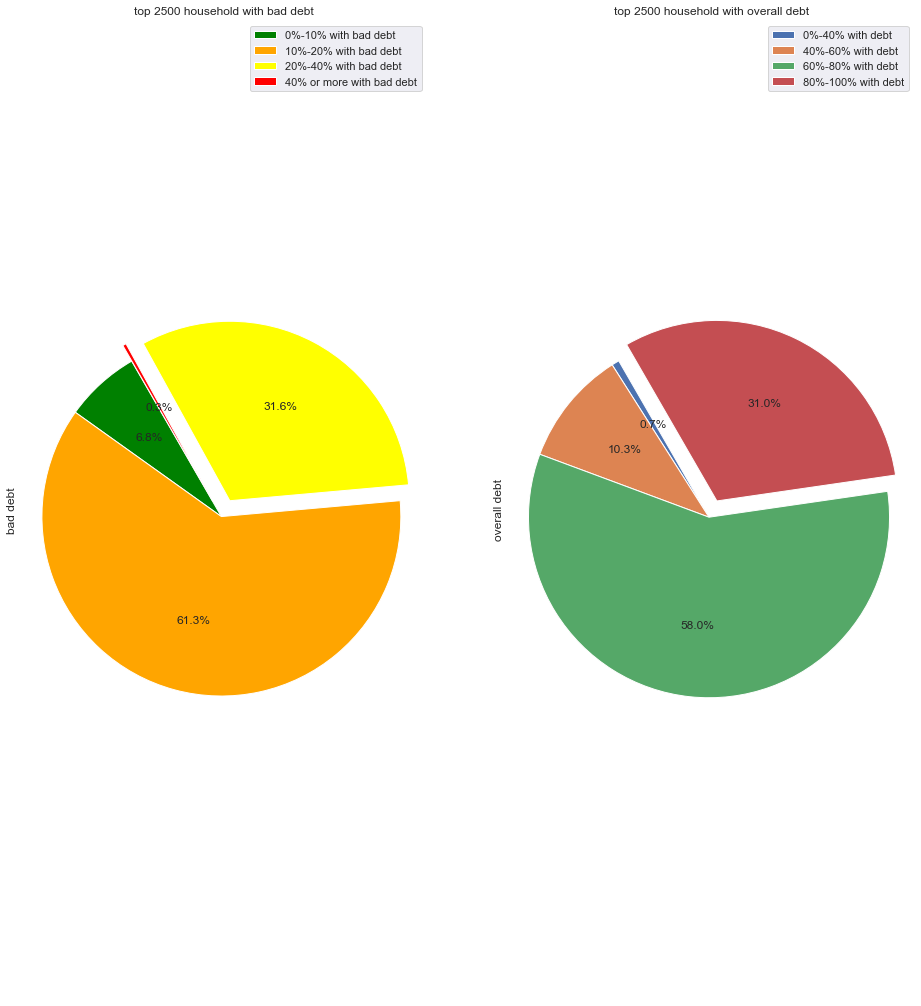

In [32]:
sns.set()
plt.subplots(figsize=(16, 18))
plt.subplot(1, 2, 1)
explode1 = (0.0, 0.0, 0.1, 0.1)
explode2 = (0.0, 0.0, 0.0, 0.1)
colors = ( "green", "orange", "yellow", "red") 
plt.title("top 2500 household with bad debt")
df_bins1.plot.pie(explode=explode1, colors=colors, startangle=120,labels=None, autopct='%1.1f%%',legend=True)
plt.axis('equal')
plt.ylabel("bad debt")
plt.subplot(1, 2, 2)
plt.title("top 2500 household with overall debt")
df_bins2.plot.pie(explode=explode2,startangle=120, autopct='%1.1f%%', labels=None, legend=True)
plt.axis('equal')
plt.ylabel("overall debt")
plt.show()

In [33]:
df = (df_train.groupby("city")["debt"]).agg(['count']).sort_values("count",ascending=False)
df.head()

count
city               
Chicago         291
Brooklyn        275
Los Angeles     235
Houston         219
Philadelphia    162

In [34]:
df_city = df.head(12)
df_city.index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Bronx', 'Phoenix', 'Miami',
       'Dallas'],
      dtype='object', name='city')

In [35]:
cities = list(df_city.index)
cities

['Chicago',
 'Brooklyn',
 'Los Angeles',
 'Houston',
 'Philadelphia',
 'San Antonio',
 'Baltimore',
 'Las Vegas',
 'Bronx',
 'Phoenix',
 'Miami',
 'Dallas']

In [36]:
df1 = pd.DataFrame()
for city in cities:
    print(city)
    df1 = df1.append(df_train[df_train['city'] == city])

Chicago
Brooklyn
Los Angeles
Houston
Philadelphia
San Antonio
Baltimore
Las Vegas
Bronx
Phoenix
Miami
Dallas


<AxesSubplot:xlabel='city', ylabel='second_mortgage'>

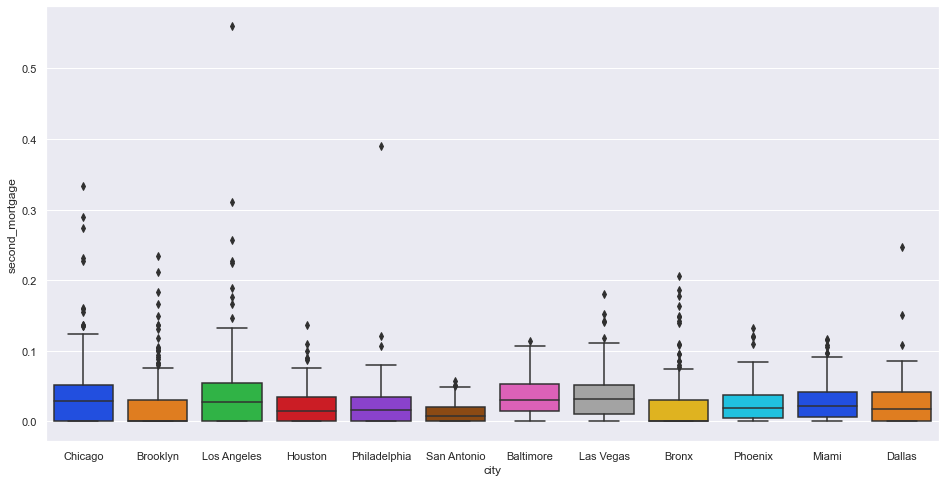

In [37]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1,palette="bright", x='city',y='second_mortgage')

<AxesSubplot:xlabel='city', ylabel='home_equity'>

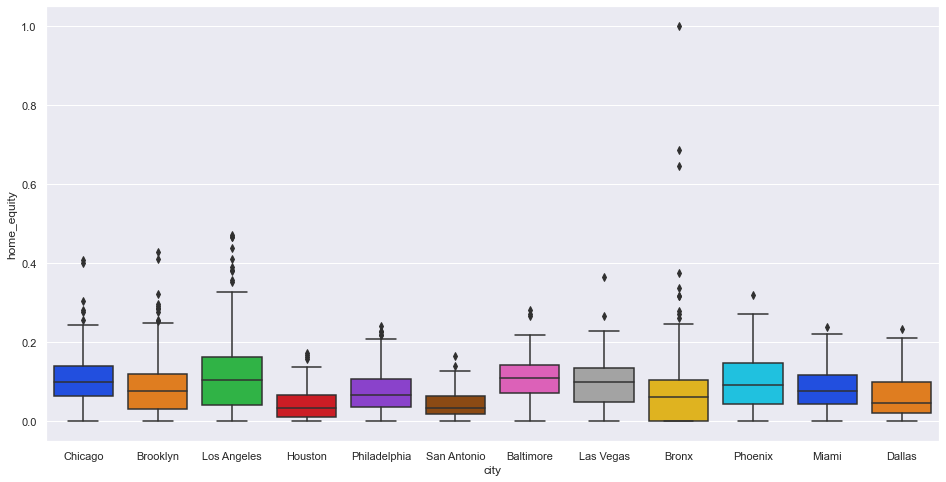

In [38]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1,palette="bright", x='city',y='home_equity')

<AxesSubplot:xlabel='city', ylabel='good_debt'>

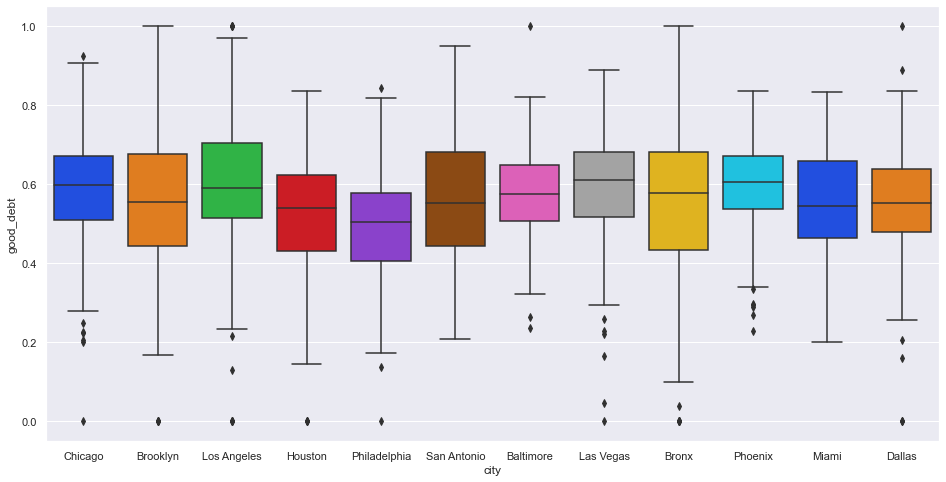

In [39]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1,palette="bright", x='city',y='good_debt')

<AxesSubplot:xlabel='city', ylabel='bad_debt'>

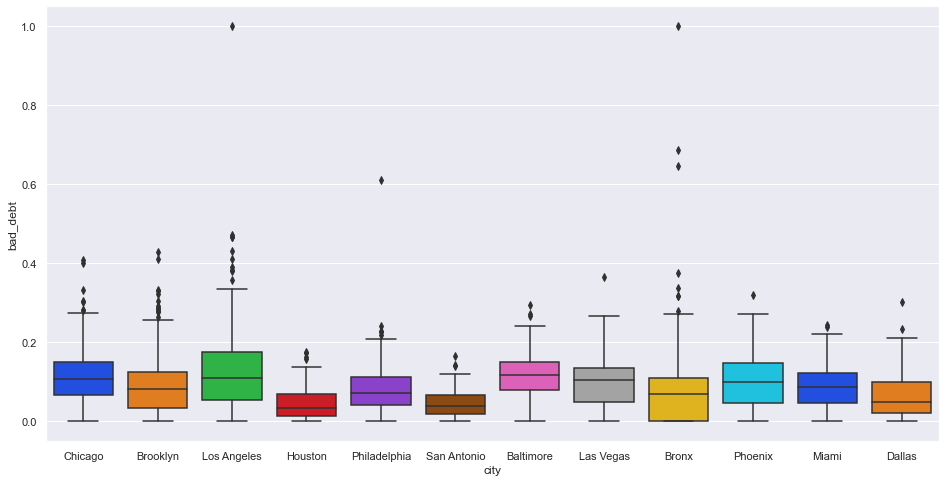

In [40]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1,palette="bright", x='city',y='bad_debt')

In [41]:
df_train['remaining_income'] = df_train['family_mean'] - df_train['hi_mean']
df_train[['city','family_mean','hi_mean','remaining_income']].head(10)

city   family_mean       hi_mean  remaining_income
UID                                                                      
267822             Hamilton   67994.14790   63125.28406        4868.86384
246444           South Bend   50670.10337   41931.92593        8738.17744
245683             Danville   95262.51431   84942.68317       10319.83114
279653             San Juan   56401.68133   48733.67116        7668.01017
247218            Manhattan   54053.42396   31834.15466       22219.26930
221087              Trinity   60875.74450   56912.14107        3963.60343
286689               Nocona   68632.82777   57872.25064       10760.57713
280558              Taylors   84050.66542   74276.59665        9774.06877
269138  South Richmond Hill   69349.72400   69482.99919        -133.27519
227164  Rancho Palos Verdes  135702.84030  119148.78380       16554.05650

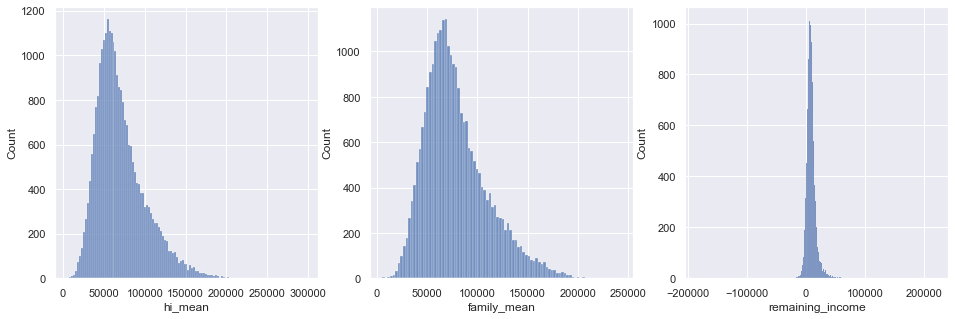

In [42]:
plt.subplots(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_train['hi_mean'])
plt.subplot(1, 3, 2)
sns.histplot(df_train['family_mean'])
plt.subplot(1, 3, 3)
sns.histplot(df_train['remaining_income'])
plt.show()

<Figure size 1800x1080 with 0 Axes>

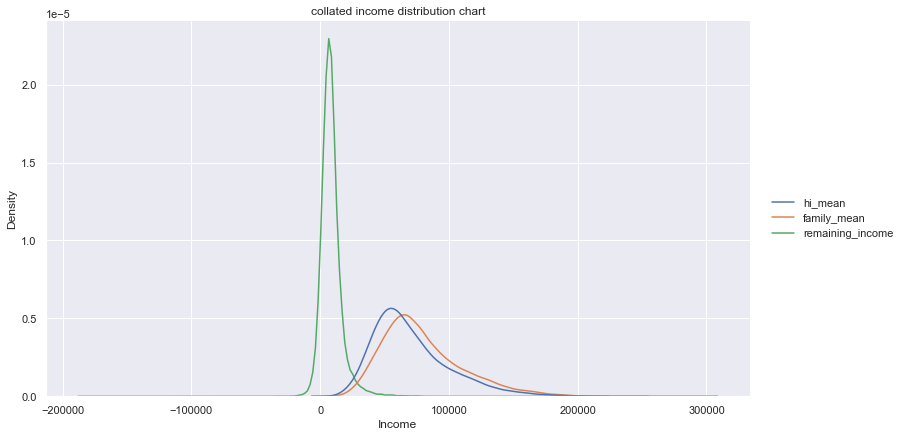

In [43]:
plt.figure(figsize=(25, 15))
#sns.boxplot(df_train['hi_mean'])
sns.displot(data = df_train[['hi_mean','family_mean','remaining_income']], kind="kde",height=6,aspect=1.8)
plt.title('collated income distribution chart')
plt.xlabel("Income")
plt.show()

### Exploratory Data Analysis (EDA 2):

* Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

* Use pop and ALand variables to create a new field called population density

* Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

* Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

    * a) Analyze the married, separated, and divorced population for these population brackets
    * b) Visualize using appropriate chart type


* Please detail your observations for rent as a percentage of income at an overall level, and for different states.

* Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

 

In [44]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [45]:
df_test['pop_density']=df_test['pop']/df_test['ALand']

In [46]:
mp = df_train['male_age_median'] * df_train['male_pop']
fp = df_train['female_age_median'] * df_train['female_pop']
p = df_train['pop']
df_train['age_median'] = (mp + fp) / p

In [47]:
mp = df_test['male_age_median'] * df_test['male_pop']
fp = df_test['female_age_median'] * df_test['female_pop']
p = df_test['pop']
df_test['age_median'] = (mp + fp) / p

In [48]:
df_train[['city','state','male_age_median','female_age_median','age_median','male_pop','female_pop','pop','pop_density']].head()

city        state  male_age_median  female_age_median  \
UID                                                                   
267822    Hamilton     New York         44.00000           45.33333   
246444  South Bend      Indiana         32.00000           37.58333   
245683    Danville      Indiana         40.83333           42.83333   
279653    San Juan  Puerto Rico         48.91667           50.58333   
247218   Manhattan       Kansas         22.41667           21.58333   

        age_median  male_pop  female_pop   pop  pop_density  
UID                                                          
267822   44.667430      2612        2618  5230     0.000026  
246444   34.722748      1349        1284  2633     0.001687  
245683   41.774472      3643        3238  6881     0.000099  
279653   49.879012      1141        1559  2700     0.002442  
247218   21.965629      2586        3051  5637     0.002207

<function matplotlib.pyplot.show(close=None, block=None)>

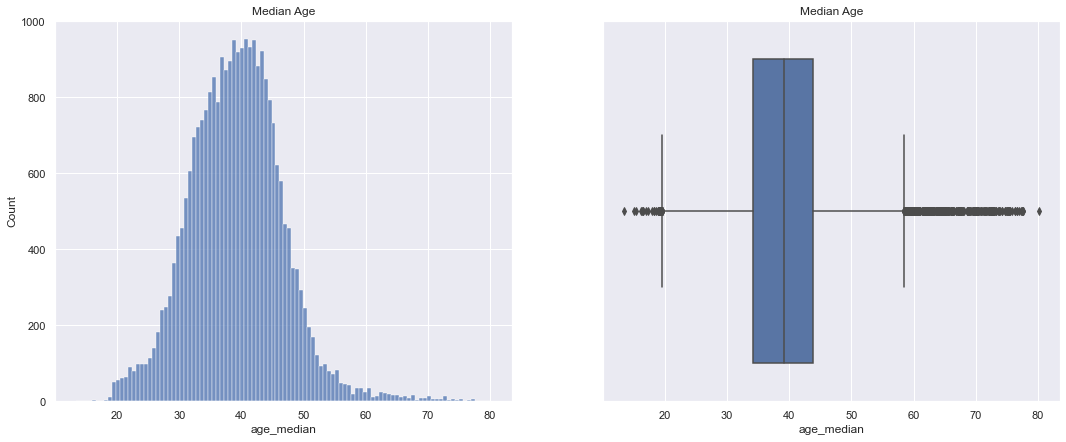

In [49]:
plt.subplots(figsize=(18, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train['age_median'])
plt.title('Median Age')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_train['age_median'])
plt.title('Median Age')
plt.show

In [50]:
df_population = df_train[['state', 'pop','pop_density', 'male_pop', 'female_pop', 'rent_mean', 'family_mean', 'age_median', 'married', 'separated', 'divorced']]
bins = [0,17,30,45,65,100]
age_group = ['youth',' adult','middle','older','senior']
df_population['age group'] = pd.cut(df_population['age_median'], bins=bins, labels = age_group)
df_population.head()

state   pop  pop_density  male_pop  female_pop  rent_mean  \
UID                                                                       
267822     New York  5230     0.000026      2612        2618  769.38638   
246444      Indiana  2633     0.001687      1349        1284  804.87924   
245683      Indiana  6881     0.000099      3643        3238  742.77365   
279653  Puerto Rico  2700     0.002442      1141        1559  803.42018   
247218       Kansas  5637     0.002207      2586        3051  938.56493   

        family_mean  age_median  married  separated  divorced age group  
UID                                                                      
267822  67994.14790   44.667430  0.57851    0.01240   0.08770    middle  
246444  50670.10337   34.722748  0.34886    0.01426   0.09030    middle  
245683  95262.51431   41.774472  0.64745    0.01607   0.10657    middle  
279653  56401.68133   49.879012  0.47257    0.02021   0.10106     older  
247218  54053.42396   21.965629  0.12356    0.00000   0.03109     adult

In [51]:
df_population['age_median'].isnull().sum()

0

In [52]:
df_train['age_median'].describe()

count    27019.000000
mean        39.251020
std          7.580643
min         13.378362
25%         34.167624
50%         39.214730
75%         43.889041
max         80.166670
Name: age_median, dtype: float64

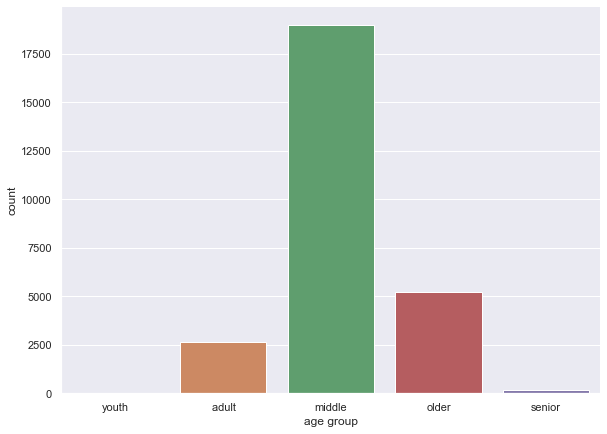

In [53]:
sns.catplot(x="age group", kind="count",height=6,aspect=1.4, data=df_population)

In [54]:
df_population.head()

state   pop  pop_density  male_pop  female_pop  rent_mean  \
UID                                                                       
267822     New York  5230     0.000026      2612        2618  769.38638   
246444      Indiana  2633     0.001687      1349        1284  804.87924   
245683      Indiana  6881     0.000099      3643        3238  742.77365   
279653  Puerto Rico  2700     0.002442      1141        1559  803.42018   
247218       Kansas  5637     0.002207      2586        3051  938.56493   

        family_mean  age_median  married  separated  divorced age group  
UID                                                                      
267822  67994.14790   44.667430  0.57851    0.01240   0.08770    middle  
246444  50670.10337   34.722748  0.34886    0.01426   0.09030    middle  
245683  95262.51431   41.774472  0.64745    0.01607   0.10657    middle  
279653  56401.68133   49.879012  0.47257    0.02021   0.10106     older  
247218  54053.42396   21.965629  0.12356    0.00000   0.03109     adult

<function matplotlib.pyplot.show(close=None, block=None)>

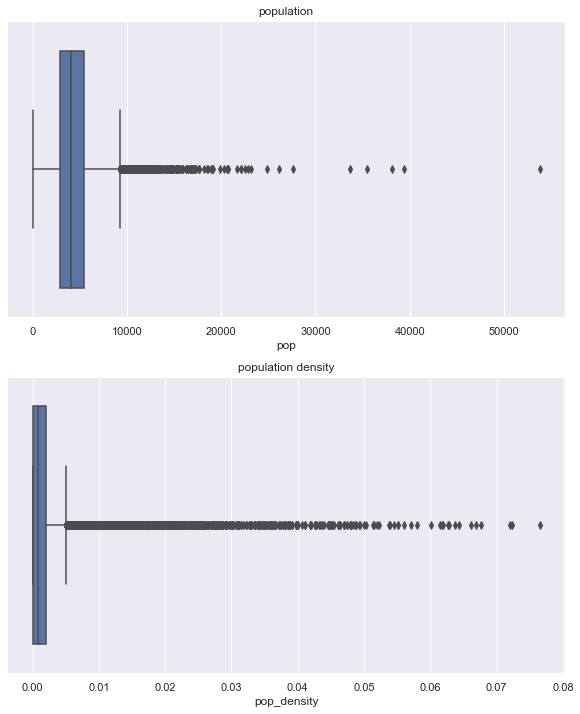

In [55]:
sns.set()
plt.subplots(figsize=(10, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x=df_population['pop'])
plt.title('population')
plt.subplot(2, 1, 2)
sns.boxplot(x=df_population['pop_density'])
plt.title('population density')
plt.show

In [56]:
table = pd.pivot_table(data=df_population,index=['state'],aggfunc = np.mean)
table.head()

age_median  divorced   family_mean   female_pop     male_pop  \
state                                                                      
Alabama      39.946933  0.119342  66971.876844  2118.268293  2014.436585   
Alaska       35.937525  0.116375  92136.545109  2181.493333  2376.733333   
Arizona      39.723169  0.108645  73348.198747  2227.844278  2187.579737   
Arkansas     39.296217  0.125978  64409.153057  2167.638060  2094.283582   
California   37.742408  0.081855  87867.563056  2434.826823  2412.520913   

             married          pop  pop_density    rent_mean  separated  
state                                                                   
Alabama     0.512794  4132.704878     0.000352   772.634117   0.023150  
Alaska      0.474037  4558.226667     0.000721  1185.763570   0.016903  
Arizona     0.513968  4415.424015     0.001327  1099.015280   0.015094  
Arkansas    0.533413  4261.921642     0.000343   718.425272   0.021311  
California  0.498313  4847.347736     0.003348  1475.228362   0.019727

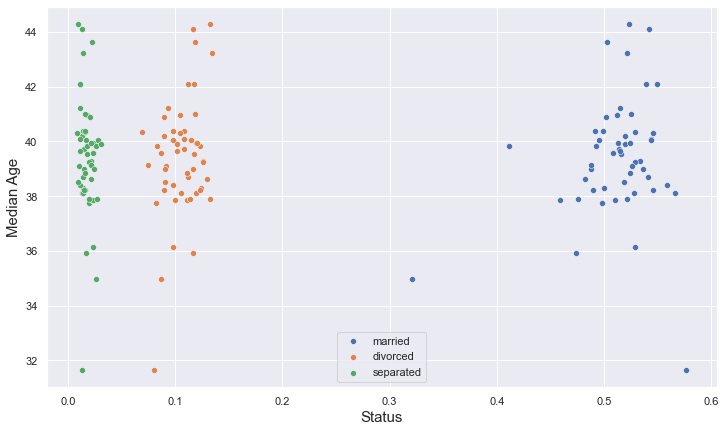

In [57]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x='married', y='age_median', data=table, palette='bright')
sns.scatterplot(x='divorced', y='age_median', data=table, palette='bright')
sns.scatterplot(x='separated', y='age_median', data=table, palette='bright')
plt.xlabel("Status", fontsize = 15)
plt.ylabel("Median Age", fontsize = 15)
plt.legend(labels=['married','divorced','separated'])
plt.show()

In [58]:
states = list(table.index)

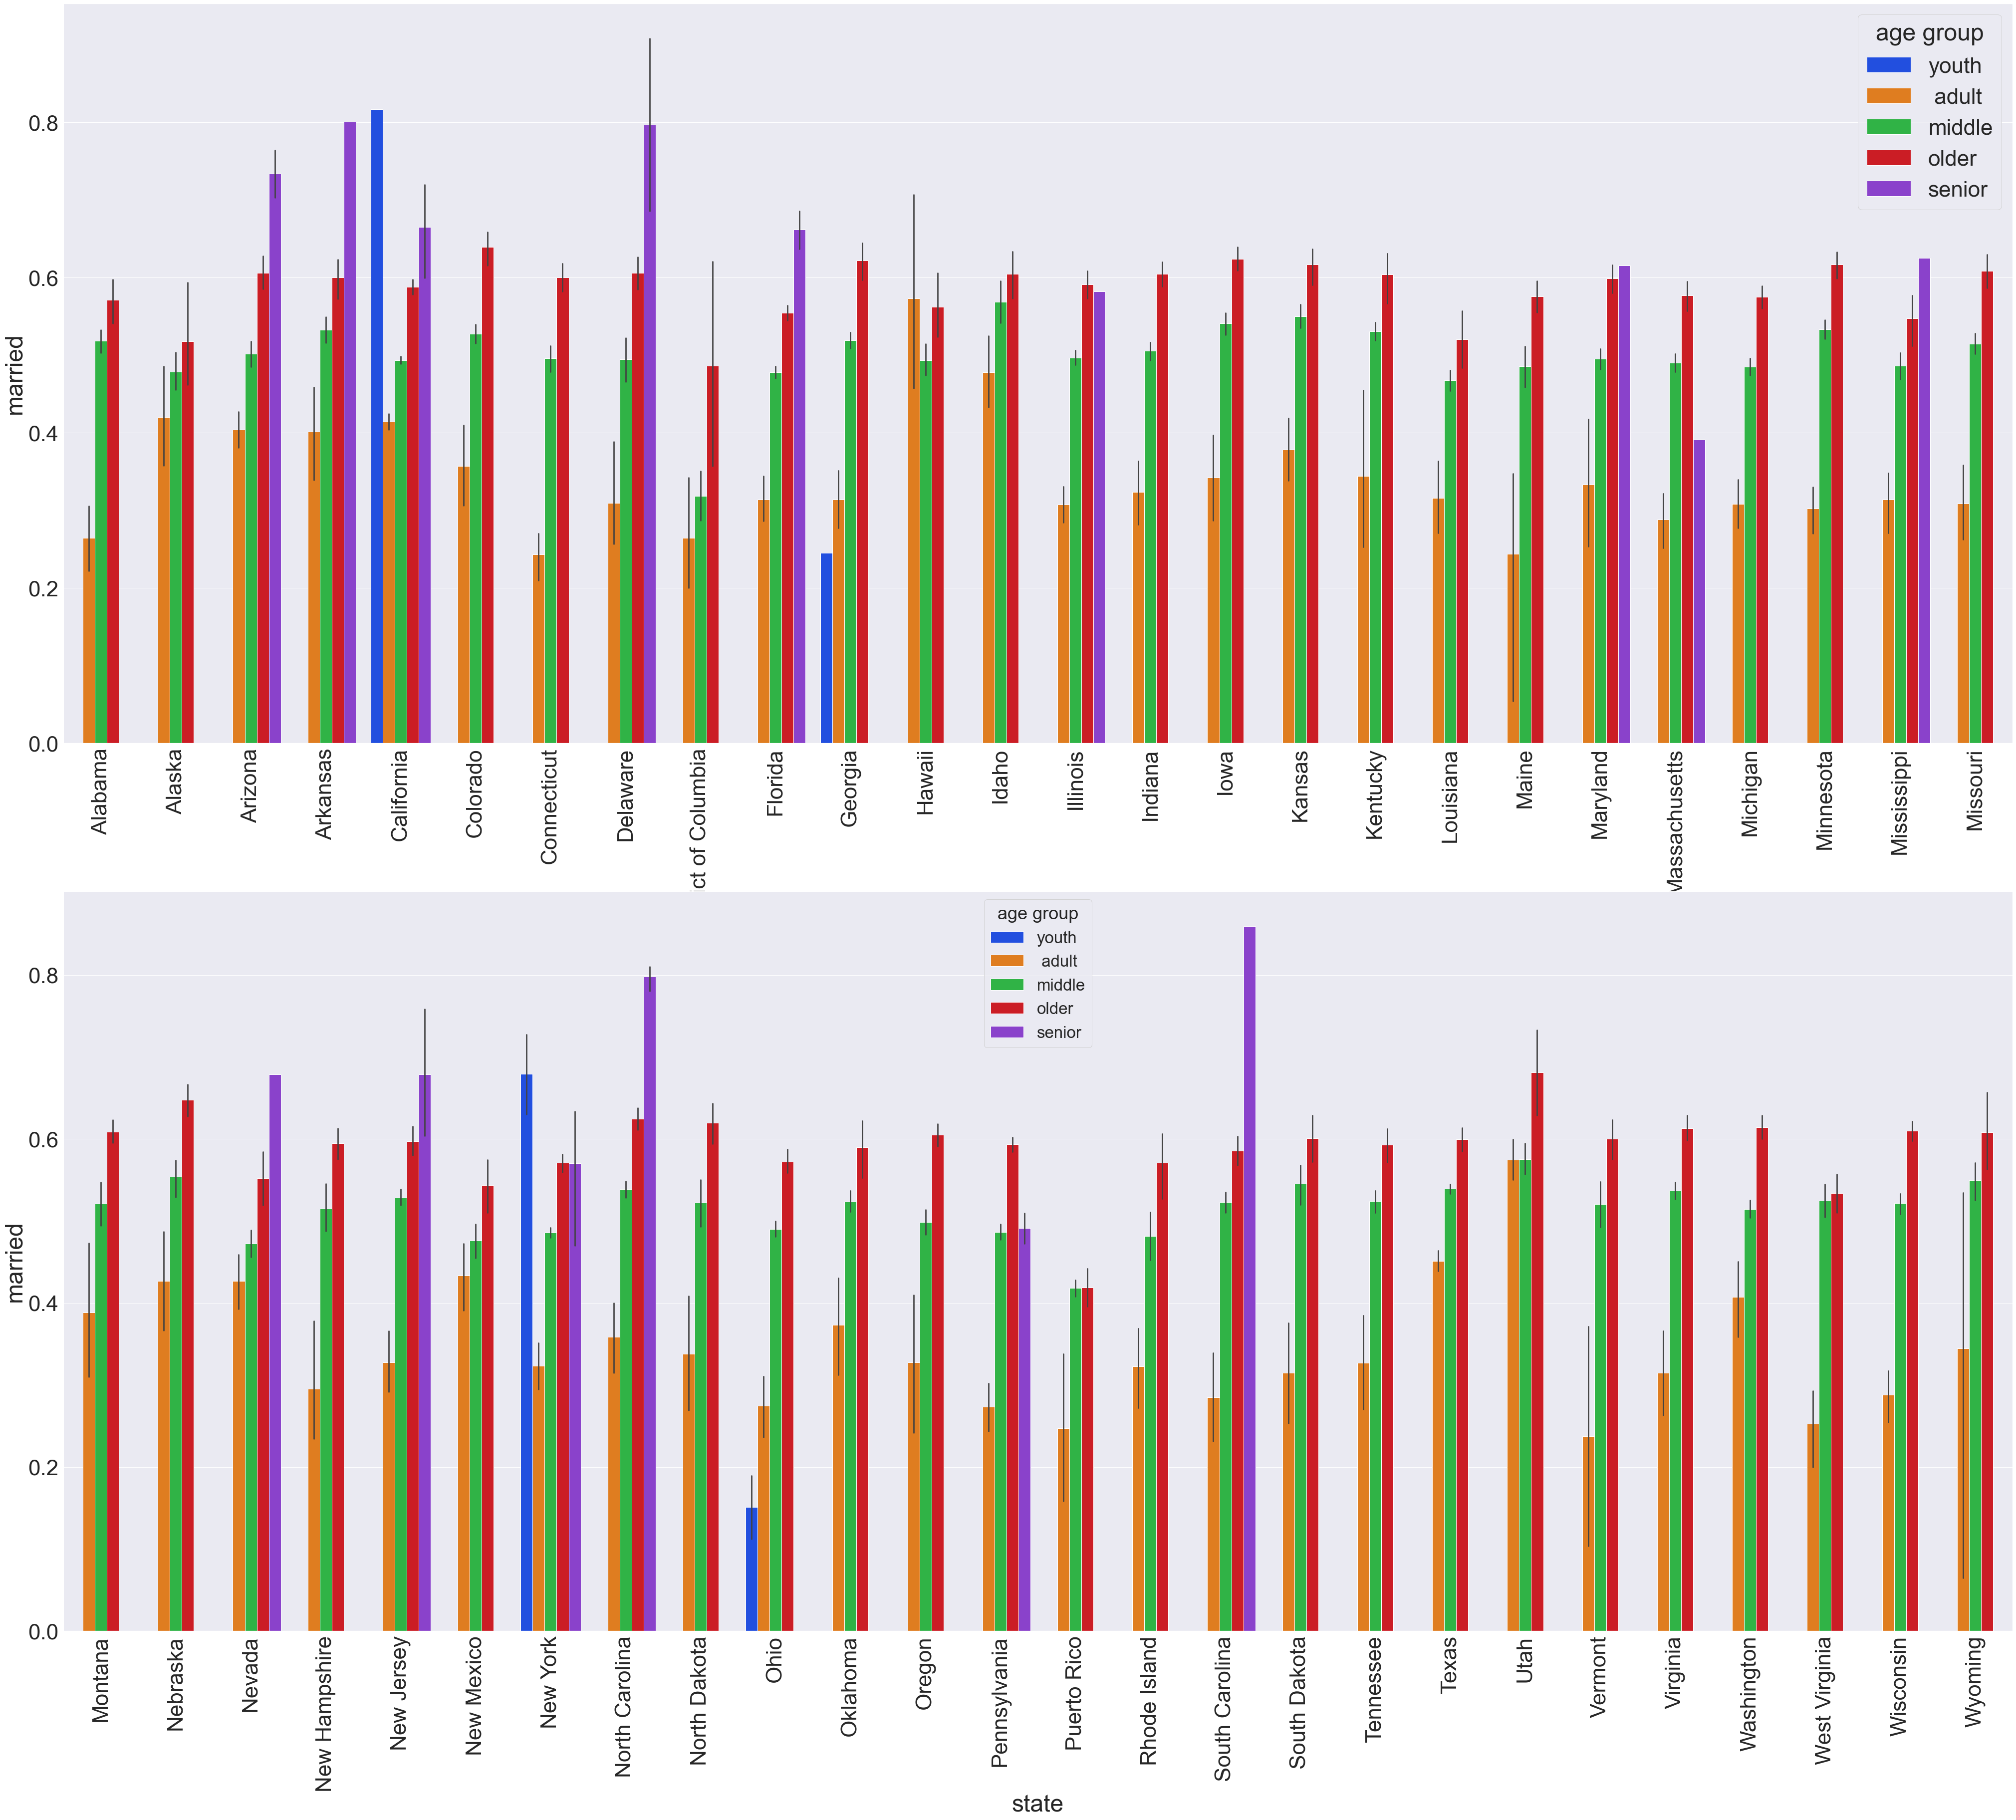

In [59]:
sns.set(font_scale = 4)
plt.subplots(figsize=(70, 60))
plt.subplot(2, 1, 1)

sns.barplot(x = "state", y = 'married', hue = 'age group', order=states[0:26], palette="bright", data=df_population)
x = plt.xticks(rotation=90)
plt.subplot(2, 1, 2)
sns.set(font_scale = 3)
sns.barplot(x = "state", y = 'married', hue = 'age group', order=states[26:52], palette="bright", data=df_population)
x = plt.xticks(rotation=90)

In certain states like Delaware, North Carolina and South Carolina there are 80 or more percent of seniors who remain married. These states are ideal locations for couples after retirement. Each states shows a consistent number of middle aged couples surpassing 50 percent and older couples surpassing 60 percent.  

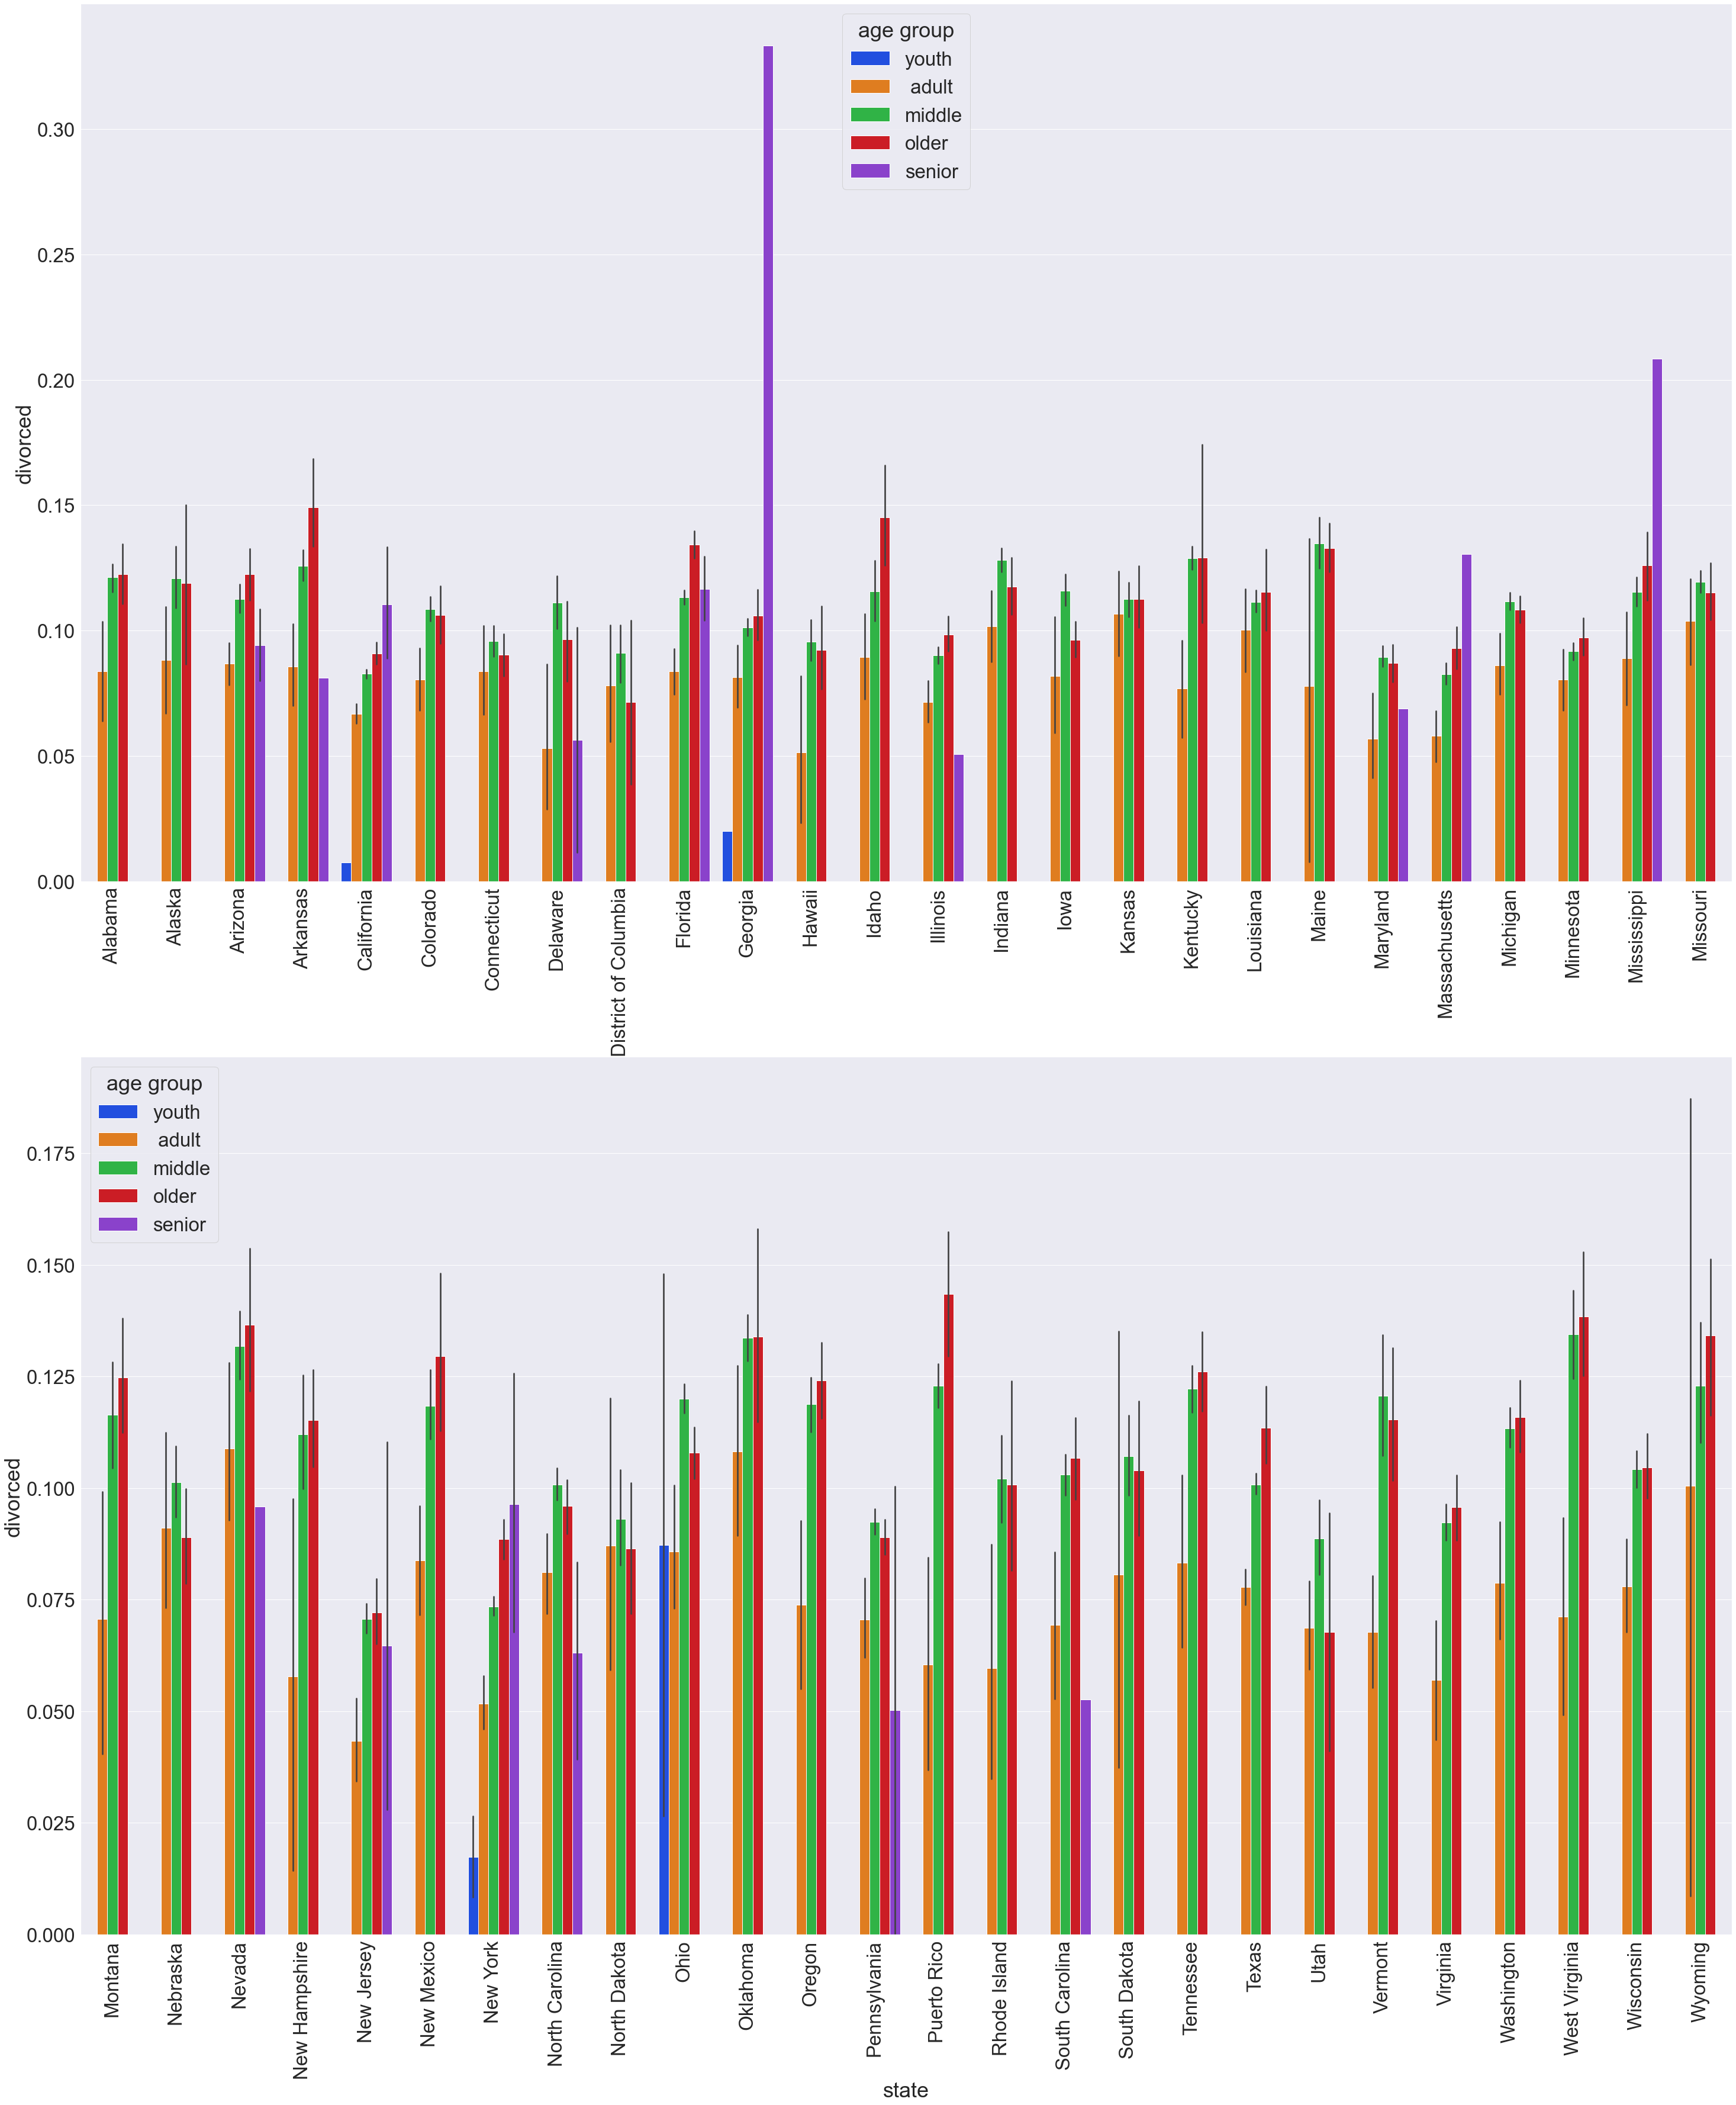

In [60]:
plt.subplots(figsize=(50, 60))
plt.subplot(2, 1, 1)
sns.barplot(x = "state", y = 'divorced', hue = 'age group',order=states[0:26], palette="bright", data=df_population)
sns.set(font_scale = 3)
x = plt.xticks(rotation=90)
plt.subplot(2, 1, 2)
sns.barplot(x = "state", y = 'divorced', hue = 'age group',order=states[26:52], palette="bright", data=df_population)
sns.set(font_scale = 3)
x = plt.xticks(rotation=90)

1. Divorced rate for adult, middle and older have the corresponding ranges: 0.75 - 0.11, 0.75 - 0.13 and 0.75 - 0.15
2. Georgia and mississipi have an unusually high divorced rate among seniors.

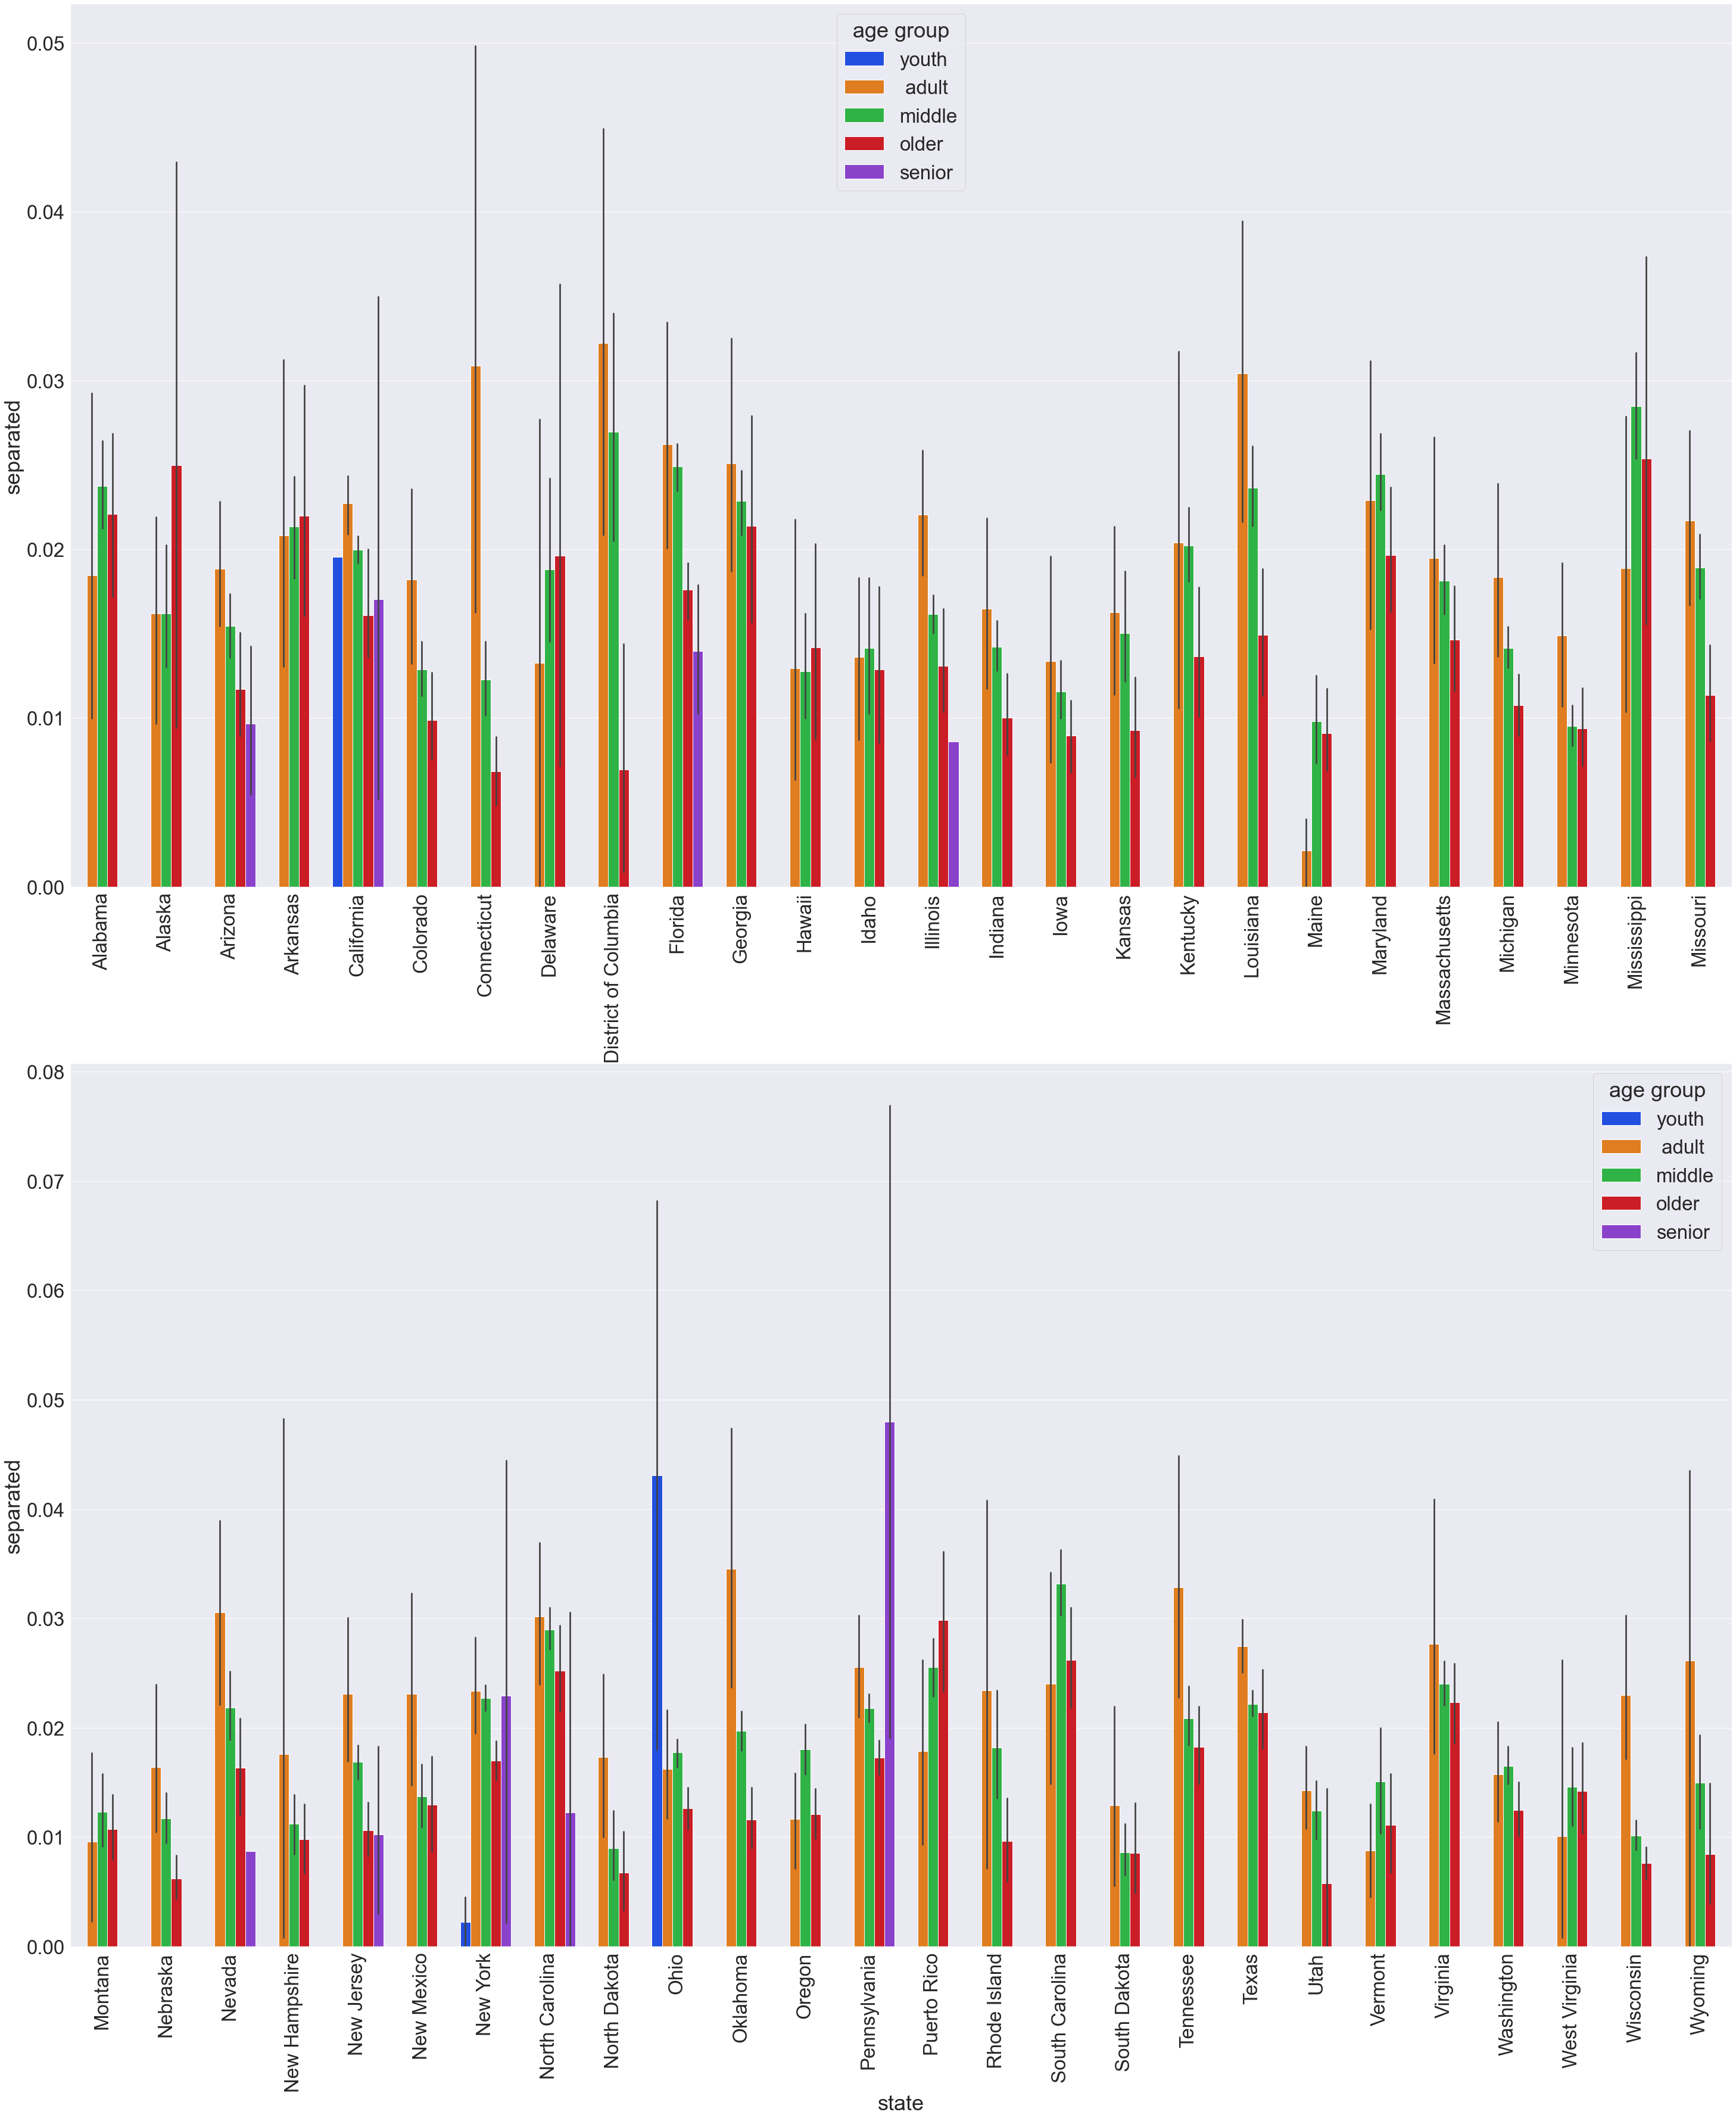

In [61]:
plt.subplots(figsize=(50, 60))
plt.subplot(2, 1, 1)
sns.barplot(x = "state", y = 'separated', hue = 'age group',order=states[0:26], palette="bright", data=df_population)
sns.set(font_scale = 3)
x = plt.xticks(rotation=90)
plt.subplot(2, 1, 2)
sns.barplot(x = "state", y = 'separated', hue = 'age group',order=states[26:52], palette="bright", data=df_population)
sns.set(font_scale = 3)
x = plt.xticks(rotation=90)

In [62]:
df_train['rent_to_income']  = df_train['rent_mean'] / df_train['family_mean']
rent_to_income = df_train['rent_to_income'].mean() * 100
rent_to_income

1.410158472790122

###### rent as a percentage of income at an overall level: 1.41 %

In [63]:
rent_to_income_state = df_train.groupby(by='state')['rent_to_income'].agg(['mean'])
rent_to_income_state = round(rent_to_income_state['mean'] * 100,2)

##### rent as a percentage of income for different states

In [64]:
rent_to_income_state

state
Alabama                 1.21
Alaska                  1.32
Arizona                 1.58
Arkansas                1.17
California              1.79
Colorado                1.42
Connecticut             1.35
Delaware                1.35
District of Columbia    1.45
Florida                 1.69
Georgia                 1.41
Hawaii                  1.85
Idaho                   1.22
Illinois                1.38
Indiana                 1.30
Iowa                    1.03
Kansas                  1.16
Kentucky                1.16
Louisiana               1.34
Maine                   1.19
Maryland                1.46
Massachusetts           1.31
Michigan                1.37
Minnesota               1.14
Mississippi             1.30
Missouri                1.24
Montana                 1.09
Nebraska                1.14
Nevada                  1.60
New Hampshire           1.24
New Jersey              1.47
New Mexico              1.29
New York                1.54
North Carolina          1.28
North Da

In [65]:
cor=df_train[['COUNTYID', 'STATEID','zip_code','area_code','type' ,'pop','pop_density', 'rent_mean','rent_gt_10','rent_gt_15','hi_mean', 'family_mean', 'hc_mean',
              'second_mortgage','hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_samples', 
              'home_equity', 'debt', 'bad_debt', 'hs_degree', 'age_median', 'pct_own', 'married', 'separated', 'divorced']].corr()

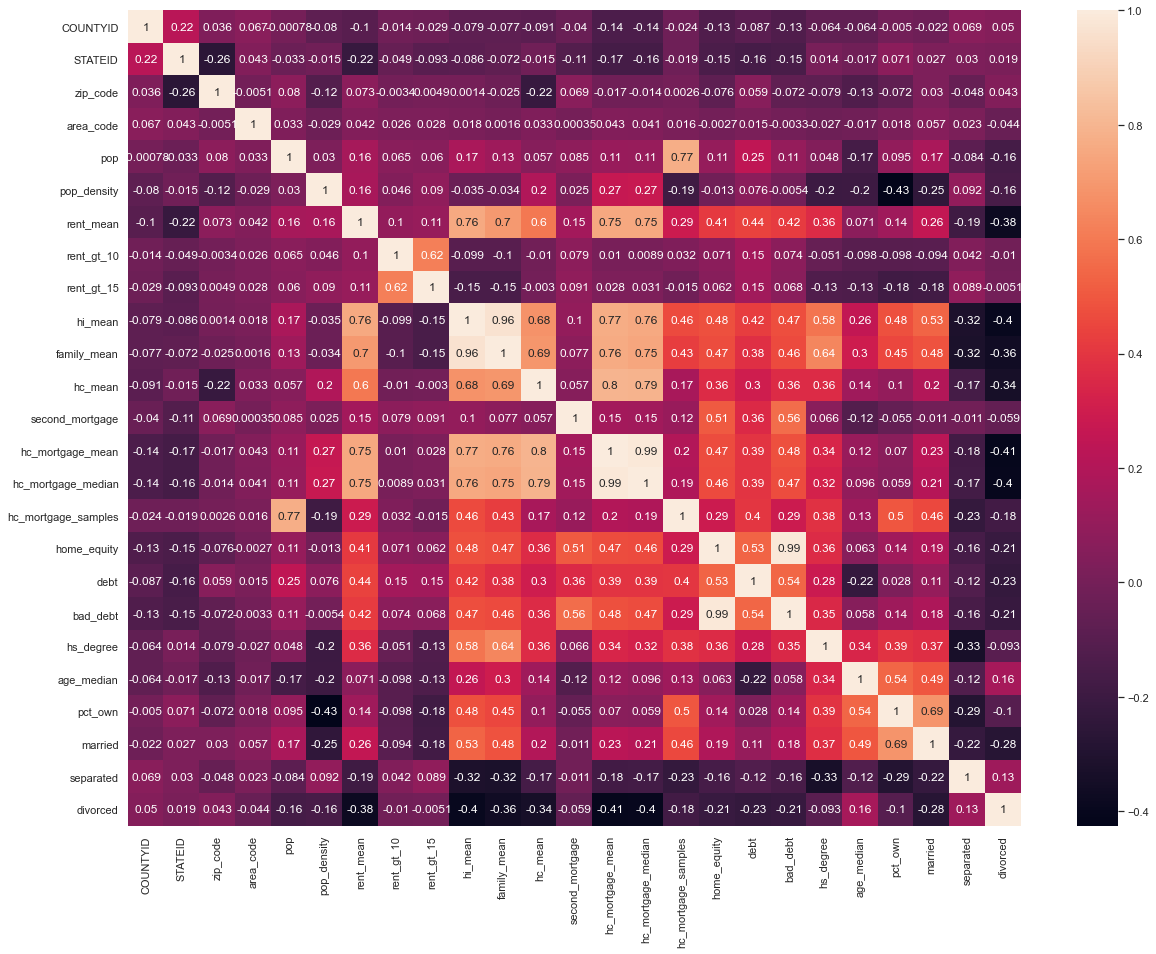

In [66]:
sns.set()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show()

interesting find:

1. pop_density is negative correlated with pct_own
2. Area in bottom right showing mostly orange and red that borders along the following: 
    'hi_mean', 'family_mean', 'hc_mean', 'second_mortgage','hc_mortgage_mean', 
    'home_equity', 'debt', 'bad_debt', 'hs_degree', 'age_median', 
    are variables we need to take into consideration when building our model.

### Data Pre-processing:


* The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

    * Highschool graduation rates

    * Median population age

    * Second mortgage statistics

    * Percent own

    * Bad debt expense
    
    

In [67]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41441 sha256=63450f8a3592d6f78d15baa7fca96acf6dea04eb3841d57ad5d848595816e7d1
  Stored in directory: c:\users\mglee\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


In [68]:
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = df_train.select_dtypes(include = 'float')

In [70]:
fa = FactorAnalyzer(n_factors = 5, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [71]:
ev, v = fa.get_eigenvalues()
ev

array([ 1.55620034e+01,  9.04895112e+00,  8.79769032e+00,  4.84633975e+00,
        3.84788843e+00,  2.80397870e+00,  2.38309657e+00,  1.77546412e+00,
        1.55821830e+00,  1.29148882e+00,  1.23645142e+00,  1.16274570e+00,
        1.04469761e+00,  1.00846055e+00,  9.59743700e-01,  7.88283288e-01,
        7.37693777e-01,  6.75857268e-01,  5.85187819e-01,  5.59571704e-01,
        5.34926786e-01,  4.57442458e-01,  4.26257877e-01,  3.91189901e-01,
        3.70032203e-01,  3.41778793e-01,  3.12887879e-01,  3.07703930e-01,
        3.01814411e-01,  2.52771195e-01,  2.49564240e-01,  2.22088235e-01,
        2.02040619e-01,  1.88612082e-01,  1.81096871e-01,  1.69218097e-01,
        1.48817148e-01,  1.41701672e-01,  1.31315516e-01,  1.25975391e-01,
        1.14557293e-01,  9.74175227e-02,  9.20072436e-02,  9.01377225e-02,
        8.06140287e-02,  6.06284870e-02,  5.76375519e-02,  4.65567015e-02,
        3.52736355e-02,  3.09495114e-02,  2.50461776e-02,  2.15330387e-02,
        1.90796253e-02,  

In [72]:
np.set_printoptions(suppress=True)
#sorted(ev)

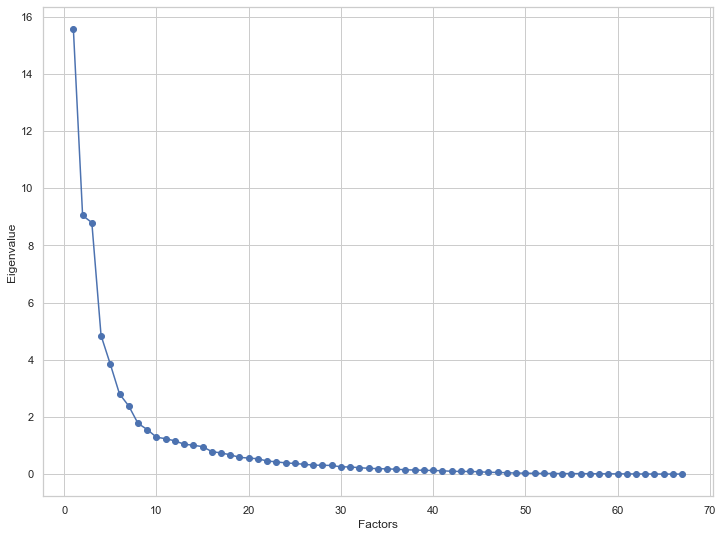

In [73]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,9))
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.xlabel('Factors')
plt.ylabel('Eigenvalue') 
plt.show()

In [74]:
fa = FactorAnalyzer(n_factors = 12, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=12, rotation='varimax', rotation_kwargs={})

In [75]:
np.set_printoptions(suppress=True)
loadings = pd.DataFrame(fa.loadings_, columns=['factor1', 'factor2', 'factor3', 'factor4','factor5','factor6', 'factor7', 'factor8', 'factor9','factor10','factor11','factor12'], index=df.columns)
#loadings

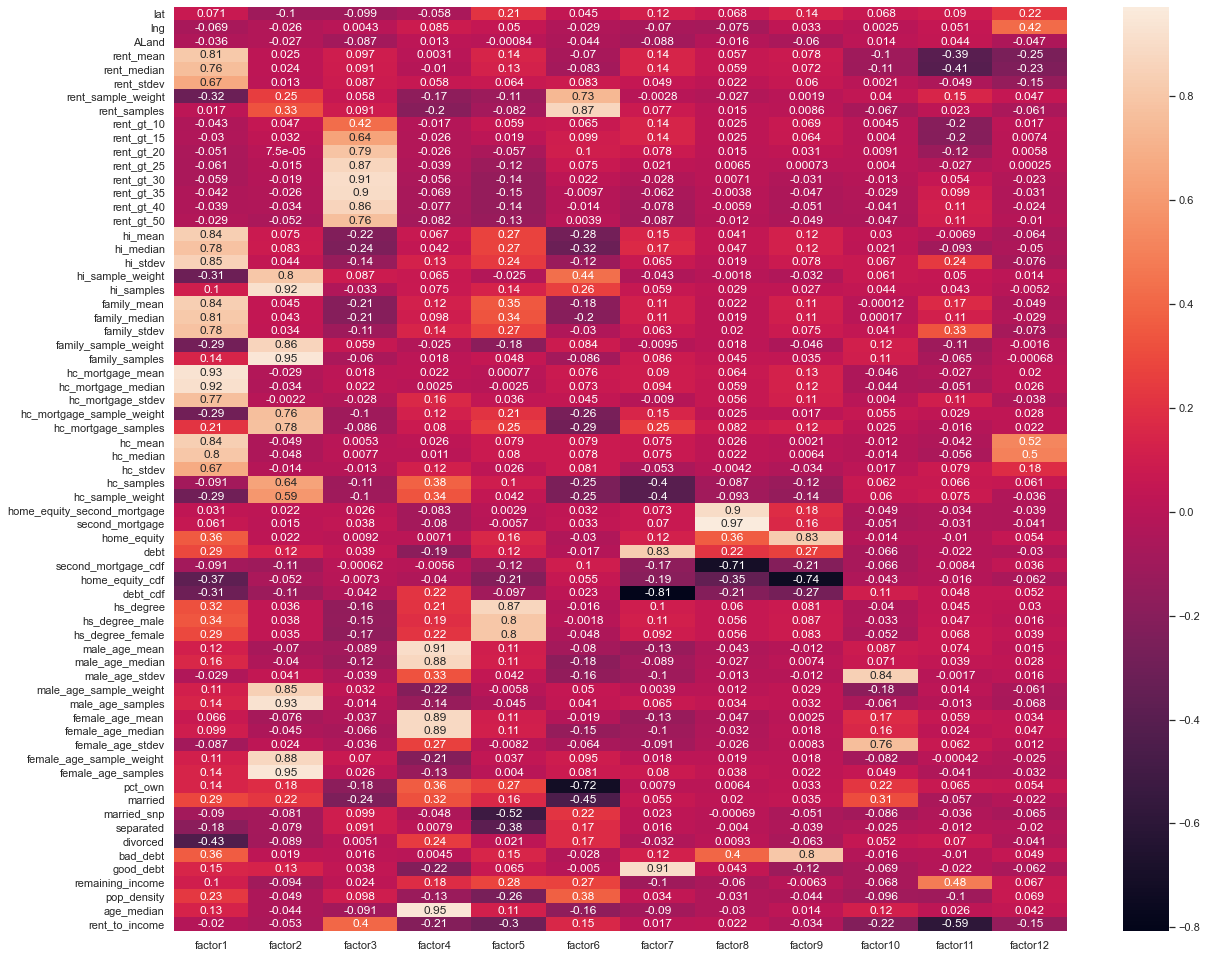

In [76]:
sns.set()
plt.figure(figsize=(20,17))
sns.heatmap(loadings,annot=True)
plt.show()

In [77]:
loadings.index

Index(['lat', 'lng', 'ALand', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'fem

In [78]:
# factor 1 - 'rent_mean', 'rent_median', 'rent_stdev', 'hi_mean', 'hi_median', 'hi_stdev', 
#            'family_mean', 'family_median', 'family_stdev'
#            'hc_mortgage_mean','hc_mortgage_median', 'hc_mortgage_stdev',
#            'hc_mean', 'hc_median', 'hc_stdev', 'divorced'
# factor 2 - 'hi_sample_weight','hi_samples', 'family_sample_weight', 'family_samples', mortgage_samples
# factor 3 - 'rent_gt_15' - 'rent_gt_50'
# factor 4 - 'age_median'
# factor 5 - 'hs_degree', 'hs_degree_male', 'hs_degree_female'
# factor 6 - 'pct_own', 'married'
# factor 7 - 'debt'
# factor 8 - 'home_equity_second_mortgage', 'second_mortgage'
# factor 9 - 'home_equity', 'bad_debt'
# factor 10 - 'male_age_stdev', 'female_age_stdev'
# factor 11 - 'rent_to_income'
# factor 12 -  none

### Data Modeling :

* Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

    a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

    b) Run another model at State level. There are 52 states in USA.

    c) Keep below considerations while building a linear regression model. Data Modeling :

* Variables should have significant impact on predicting Monthly mortgage and owner costs

* Utilize all predictor variable to start with initial hypothesis

* R square of 60 percent and above should be achieved

* Ensure Multi-collinearity does not exist in dependent variables

* Test if predicted variable is normally distributed

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [80]:
pd.set_option('display.max_columns', None)

In [81]:
df_train['type'] = df_train['type'].astype('category')
df_train['type'] = df_train['type'].cat.codes
df_train['type'].unique()

array([2, 4, 3, 1, 5, 0], dtype=int8)

In [82]:
df_test['type'] = df_test['type'].astype('category')
df_test['type'] = df_test['type'].cat.codes
df_test['type'].unique()

array([1, 2, 0, 3, 5, 4], dtype=int8)

In [83]:
features = ['STATEID', 'zip_code', 'type', 'lat', 'lng', 'pop_density', 'rent_mean', 'rent_median', 'rent_stdev', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight','hi_samples',
            'family_mean', 'family_median', 'family_stdev', 'hc_mean', 'hc_median', 'hc_stdev' ,'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt','hs_degree',
             'pct_own', 'married', 'divorced', 'age_median']
target = ['hc_mortgage_mean']

In [84]:
Xtrain = df_train[features]
ytrain = df_train[target]

In [85]:
Xtest = df_test[features]
ytest = df_test[target]

In [86]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(27019, 29)
(27019, 1)
(11603, 29)
(11603, 1)


#### Testing for Multi-collinearity with Variance Inflation Factor 

Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

The goal is to keep the scores around 5, but will use a cutoff score of 8 or above; however, having something above that does not mean it will be automatically dropped.

In [87]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
x_temp = sm.add_constant(Xtrain)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

    VIF Factor                     features
0        339.7                        const
1          1.3                      STATEID
2          9.1                     zip_code
3          1.2                         type
4          1.3                          lat
5          9.3                          lng
6          1.5                  pop_density
7         35.7                    rent_mean
8         27.2                  rent_median
9          2.5                   rent_stdev
10       144.0                      hi_mean
11        75.1                    hi_median
12        31.1                     hi_stdev
13        12.9             hi_sample_weight
14        11.8                   hi_samples
15       100.3                  family_mean
16        54.8                family_median
17        17.4                 family_stdev
18        36.2                      hc_mean
19        28.3                    hc_median
20         2.7                     hc_stdev
21         8.0  home_equity_seco

From the output of the VIF scores, some variables show a severely high score, will need to exclude some features.

drop rent_median, rent_stdev, hi_median, hi_stdev, hi_sample_weight, hi_samples, family_median, family_stdev, hc_median, hc_stdev, 

In [89]:
features = ['STATEID', 'type', 'zip_code', 'lat','lng', 'pop_density', 'rent_mean', 'rent_stdev', 'hc_mean', 'hc_stdev', 'family_mean', 'second_mortgage', 'home_equity', 'debt', 'hs_degree',
             'pct_own', 'married', 'divorced', 'age_median']
target = ['hc_mortgage_mean']

In [90]:
Xtrain = df_train[features]
ytrain = df_train[target]
Xtest = df_test[features]
ytest = df_test[target]

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(27019, 19)
(27019, 1)
(11603, 19)
(11603, 1)


In [91]:
x_temp = sm.add_constant(Xtrain)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

    VIF Factor         features
0        308.0            const
1          1.3          STATEID
2          1.2             type
3          9.1         zip_code
4          1.3              lat
5          9.2              lng
6          1.5      pop_density
7          3.2        rent_mean
8          2.0       rent_stdev
9          3.5          hc_mean
10         2.1         hc_stdev
11         5.3      family_mean
12         1.5  second_mortgage
13         2.1      home_equity
14         1.9             debt
15         2.1        hs_degree
16         2.9          pct_own
17         2.4          married
18         1.5         divorced
19         2.2       age_median


##### Perform Linear Regression

Run a model at a Nation level

In [92]:
# Standardize data:
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)

In [93]:
Xtrain.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [94]:
np.set_printoptions(suppress=False)
Xtrain.mean(axis=0)

array([ 2.13012923e-17,  5.89072774e-17, -8.52051691e-17,  3.02951712e-16,
       -4.99594198e-16,  4.78621629e-17, -9.20426209e-17, -1.33856269e-16,
       -4.53638632e-17,  9.20426209e-17,  7.10043076e-17,  2.15642712e-17,
       -1.02956246e-16, -1.69884380e-16,  2.88224893e-16, -3.73430062e-17,
       -1.75932895e-16, -1.84874179e-16, -2.89539788e-16])

In [95]:
Xtest = sc.transform(Xtest)

In [96]:
Xtrain

array([[ 0.47361173, -0.23688283, -1.24536241, ...,  0.51001578,
        -0.25994856,  0.71451855],
       [-0.62590269, -0.23688283, -0.11905036, ..., -1.18259   ,
        -0.20666929, -0.59735778],
       [-0.62590269, -0.23688283, -0.13577408, ...,  1.01812918,
         0.12673598,  0.33288718],
       ...,
       [-1.23674403, -0.23688283,  1.03322747, ...,  1.43868257,
        -0.4767542 ,  0.63825469],
       [ 1.20662134,  0.58631167,  0.87685731, ...,  1.81103373,
        -0.97901377,  0.76225294],
       [ 0.22927519, -0.23688283,  1.31996817, ..., -1.21649371,
         0.67243864, -1.07099872]])

In [97]:
#Perform Linear Regression
linear_regression = linear_model.LinearRegression(fit_intercept=True, normalize=False, n_jobs=1)

In [98]:
linear_regression.fit(Xtrain,ytrain)

LinearRegression(n_jobs=1)

In [99]:
linear_regression.coef_

array([[ -12.9589891 ,    9.16033131, -126.80606113,  -33.40026258,
        -180.4495426 ,   64.07888211,   78.8251377 ,   39.00613025,
         229.0969141 ,   18.573883  ,  246.69805351,    6.08720547,
          59.47721441,    5.99249965,  -61.71368514,  -71.33794267,
          -3.12063073,  -32.32504401,   32.93509298]])

In [100]:
linear_regression.intercept_

array([1629.26050016])

In [101]:
y_predict=linear_regression.predict(Xtest)

In [102]:
mse=mean_squared_error(ytest,y_predict)
mse

64223.20094156563

In [103]:
rmse=math.sqrt(mse)
rmse

253.4229684570158

In [104]:
# Check the RSQ for the test data
linear_regression.score(X=Xtest,y=ytest)

0.8380411034959248

In [105]:
from sklearn.metrics import r2_score
r2_score(ytest,y_predict)

0.8380411034959248

##### achieved R-square score of 84 percent   
***************************************

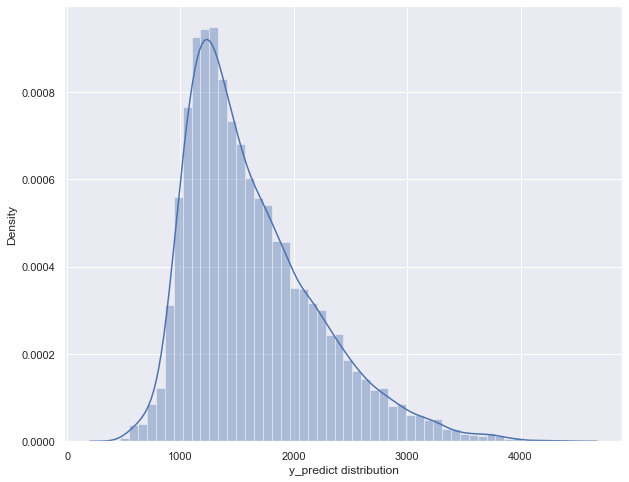

In [106]:
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(y_predict)
plt.xlabel("y_predict distribution")
plt.show()

The distribution is skewed to the right

##### Ran at state level and got a very small improvement 

In [107]:
features =  ['STATEID', 'type', 'zip_code', 'lat','lng', 'pop_density', 'rent_mean', 'rent_stdev', 'hc_mean', 'hc_stdev', 'family_mean', 'second_mortgage', 'home_equity', 'debt', 'hs_degree',
             'pct_own', 'married', 'divorced', 'age_median']
target = ['hc_mortgage_mean']

In [108]:
df_state_train = df_train[df_train['state'] == 'Texas']
df_state_test = df_test[df_test['state'] == 'Texas']

In [109]:
Xtrain = df_state_train[features]
ytrain = df_state_train[target]
Xtest = df_state_test[features]
ytest = df_state_test[target]

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(1917, 19)
(1917, 1)
(813, 19)
(813, 1)


In [110]:
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
linear_regression = linear_model.LinearRegression(fit_intercept=True,n_jobs=1)
linear_regression.fit(Xtrain,ytrain)
linear_regression.coef_

array([[ 0.00000000e+00, -2.13162821e-14, -2.02052795e+01,
        -2.38160221e+01,  2.63241033e-01, -1.27241216e+01,
        -5.59250108e+00,  1.17879768e+01,  1.75473976e+02,
         2.80907719e+01,  3.14447298e+02,  2.76231751e+01,
         3.76092128e+01, -2.22474906e+01, -2.85795461e+01,
        -8.62036203e+01,  9.18332805e+00, -1.53546649e+00,
        -9.59799144e+00]])

In [111]:
linear_regression.intercept_

array([1459.4014969])

In [112]:
y_predict=linear_regression.predict(Xtest)

In [113]:
Predicted = pd.DataFrame(y_predict,columns=["predicted"])
results = pd.concat([(ytest.reset_index(drop=True)),Predicted],axis=1)
df_predict = results
df_predict.shape

(813, 2)

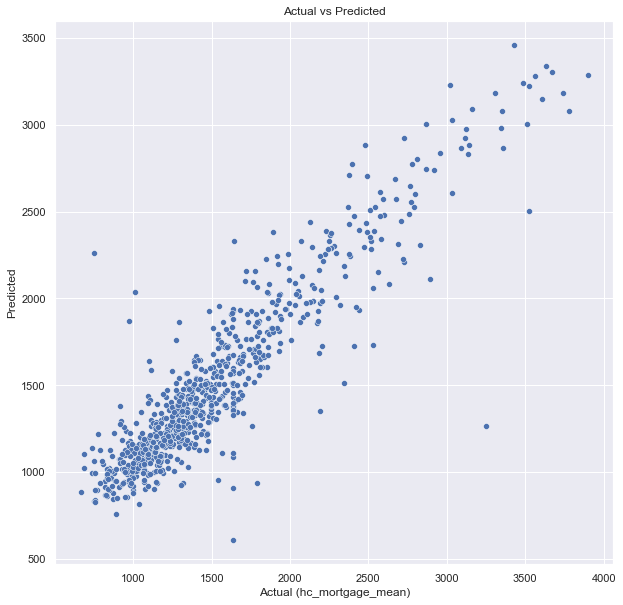

In [114]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='hc_mortgage_mean', y='predicted', data=df_predict, palette='pastel')
plt.title('Actual vs Predicted')
plt.xlabel('Actual (hc_mortgage_mean)')
plt.ylabel('Predicted')
plt.show()

In [115]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Mean monthly mortgage and owner costs')
    plt.ylabel('Proportion of household debt base on US geographical region')

    plt.show()
    plt.close()

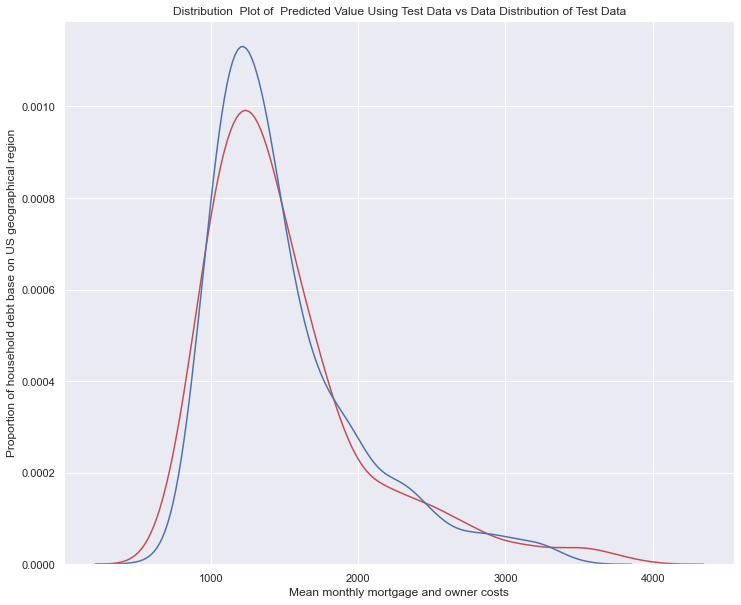

In [116]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest,y_predict,"Actual Values (Test)","Predicted Values (Test)",Title)

The distribution of the actual and predicted in the test data does reflect accurately except a slight discrepancy at 1000 - 1500

In [117]:
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - ytest) ** 2))

Residual sum of squares (MSE): 49452.16


In [118]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest,y_predict ) )

Mean absolute error: 147.32
Residual sum of squares (MSE): 49452.16
R2-score: 0.85


#### re-check 

In [119]:
mse=mean_squared_error(ytest,y_predict)
mse

49452.15722689229

In [120]:
rmse=math.sqrt(mse)
rmse

222.37840998373088

In [121]:
r2_score(ytest,y_predict)

0.8468728822433038

##### achieved R-square score of 85 percent  at the state level

___________________

#### not required, just want to experiment with the ridge regression model
To prevent overfitting a small amount of bias is introduced in ridge regression, this is also known as L2 regularization. 

When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. This is where Ridge regression comes in; however since multicollinearity is already taken care of by using factor analysis, our R2 score will not improve by much. 

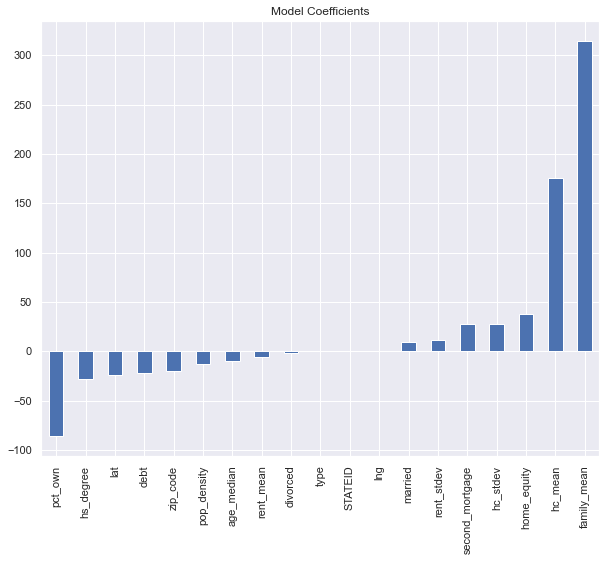

In [122]:
#checking the magnitude of coefficients
from pandas import Series
predictors = features
 
coef = Series(linear_regression.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

Top 5 variables influencing regression model are:

* second_mortgage
* pct_own
* home_equity
* hc_mean
* family_mean

In [123]:
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = RidgeCV(alphas=arange(0, 0.010, 0.0001), cv=cv, scoring='neg_mean_absolute_error')

model.fit(Xtrain, ytrain)

print('alpha: %f' % model.alpha_)

alpha: 0.009900


In [124]:
ridge_reg = linear_model.Ridge(alpha=0.0099, normalize = True)
ridge_reg.fit(Xtrain,ytrain)


Ridge(alpha=0.0099, normalize=True)

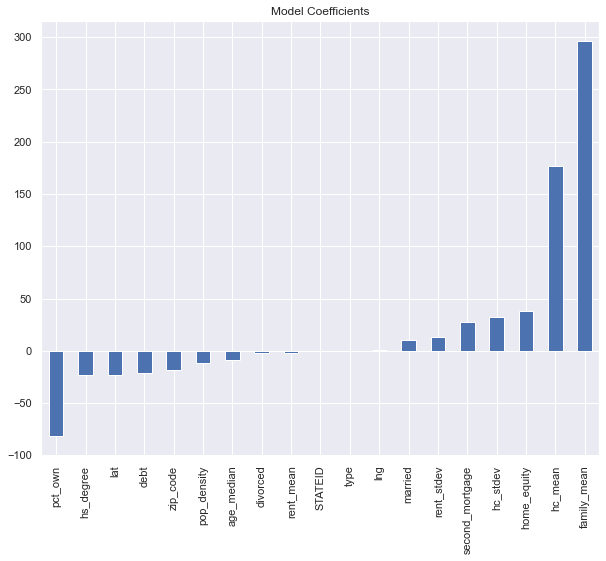

In [125]:
coef = Series(ridge_reg.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#### Accuracy on test data using Ridge Regression

In [126]:
ridge_reg.score(Xtest,ytest)

0.8469559247726692

As expected almost no improvement over regular linear regression

### Data Reporting:

* Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    * Box plot of distribution of average rent by type of place (village, urban, town, etc.).

    * Pie charts to show overall debt and bad debt.
    
    * Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent  ownership is above 10 percent. Visualize using geo-map.

    * Heat map for correlation matrix.

    * Pie chart to show the population distribution across different types of places (village, urban, town etc.)

Export cleaned and preprocessed data for tableau display

In [127]:
#top_household_2nd_mortgage.to_csv('top_household_2nd_mortgage.csv')
#df_train.to_csv('df_train.csv')

Link to Tableau dashboard

https://public.tableau.com/app/profile/ming.lee6423/viz/CapstoneRealEstateAnalysis/Dashboard1?publish=yes

#### Conclusion

Given that R² metric is very sensitive to outliers, inorder to achieve a higher accuracy a outlier detection model needs to be in the works. Since our data consists of more than 27,000 rows and more than 70 columns, and also noticing many outliers where one must be careful in removing, we will need a substantial amount of time and effort to make this happen. This will be addressed as a requirement in our future enhancements